In [134]:
from tqdm import tqdm_notebook
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
data = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')
max_num = 1100
min_num = 900
data['T'] = y
tabu_list = []

tag_tabu = []
base_score = data['T'].mean()



In [135]:
len(tag_num_tabu)

61790

In [130]:
def Make_insol(sol_num):
    sol = []
    for i in range(sol_num):
        if i ==0:
            d = [1,np.random.randint(50),np.random.randint(1,11)]
            sol.append(d)
            tag_num_tabu.append(d[:2])
        else:
            d = [np.random.randint(2),np.random.randint(50),np.random.randint(1,11)]
            sol.append(d)
            tag_num_tabu.append(d[:2])
    return sol

In [74]:
def Select_data(sol,data):
    local_data = data.copy()
    for i in range(len(sol)):
        if sol[i][0] :
            new_data = local_data[data.iloc[:,sol[i][1]] >= sol[i][2]]
        else:
            new_data = local_data[data.iloc[:,sol[i][1]] < sol[i][2]]
        local_data = new_data
    score = new_data['T'].mean()
    len_data = len(new_data)
    return score, len_data

In [ ]:
def Make_neighbor_sol2(sol,num):
    tot_sol = []
#     tot_sol.append(sol)
    a = len(sol)
    for i in range(num):
        t = Make_insol(a)
        if t[:2] not in tag_num_tabu:
            tot_sol.append(Make_insol(a))
        
    return tot_sol

In [133]:
def Make_neighbor_sol(sol,num):
    tot_sol = []
#     tot_sol.append(sol)
    a = len(sol)
    for i in range(num):
        t = Make_insol(a)
        if t[:3] not in tag_num_tabu:
            tot_sol.append(Make_insol(a))
        
    return tot_sol

In [78]:
def Make_valneighbor(sol,num):
    tot_num_list = []
    nbr_sol = []
    tem = []
    for i in range(len(sol)):
        tem.append(sol[i][2])
    tot_num_list.append(tem)
    nbr = []
    num1 = num
    while(num) :
        num-=1
        flg = True
        cnt = 0
        while(flg):
            cnt+=1
            tem_ne = []
            for i in range(len(sol)):
                tem_ne.append(np.random.randint(1,11))
            if (tem_ne not in tot_num_list) or cnt ==5:
                flg = False
                nbr.append(tem_ne)
                tot_num_list.append(tem_ne)
                
                
                
    for i in range(num1):
        nbr_sol.append([])
     
        for j in range(len(sol)):
          
            nbr_sol[i].append([sol[j][0],sol[j][1],nbr[i][j]])
#     print(nbr_sol)
    return(nbr_sol)

In [176]:
def find_local_sol(nbr):
    
    tmsc = []
    tmso = []
    for i in nbr:
        
        a,b = Select_data(i,data)
        
        if (min_num<=b<=max_num) and a > base_score:
            tmsc.append(a)
            tmso.append(i)
    if len(tmsc):
        score = max(tmsc)
        sol = tmso[tmsc.index(score)]
        return sol
    else:return 0

In [29]:
insol = Make_insol(2)

In [30]:
nbr = Make_neighbor_sol(insol,50)

In [31]:
print(nbr)

[[[1, 45, 3], [1, 39, 2]], [[1, 33, 3], [0, 40, 8]], [[1, 15, 9], [0, 14, 3]], [[1, 16, 3], [0, 41, 10]], [[1, 21, 6], [1, 27, 4]], [[1, 41, 1], [0, 14, 1]], [[1, 20, 6], [0, 35, 10]], [[1, 11, 9], [1, 8, 7]], [[1, 31, 3], [0, 22, 6]], [[1, 31, 5], [1, 11, 9]], [[1, 48, 5], [1, 30, 7]], [[1, 26, 9], [0, 47, 7]], [[1, 23, 2], [1, 11, 5]], [[1, 31, 3], [1, 46, 10]], [[1, 25, 7], [0, 31, 5]], [[1, 24, 7], [1, 33, 7]], [[1, 17, 10], [1, 6, 2]], [[1, 41, 6], [1, 28, 1]], [[1, 10, 7], [1, 36, 9]], [[1, 42, 8], [1, 2, 10]], [[1, 5, 10], [1, 30, 7]], [[1, 11, 1], [1, 9, 8]], [[1, 37, 4], [0, 29, 10]], [[1, 12, 9], [1, 29, 2]], [[1, 34, 5], [0, 28, 10]], [[1, 26, 9], [0, 9, 3]], [[1, 33, 1], [1, 17, 5]], [[1, 35, 1], [0, 49, 10]], [[1, 23, 8], [1, 30, 7]], [[1, 30, 8], [0, 21, 10]], [[1, 38, 1], [1, 49, 6]], [[1, 22, 9], [1, 2, 7]], [[1, 22, 7], [1, 44, 2]], [[1, 9, 6], [0, 0, 10]], [[1, 24, 2], [1, 46, 1]], [[1, 23, 9], [0, 40, 6]], [[1, 13, 5], [0, 24, 9]], [[1, 43, 8], [0, 9, 7]], [[1, 3, 1]

In [ ]:
##시도 1

In [49]:
sol_l = []
sol_s = []
glo_sol = []
glo_scr = []
for i in range(3):
    insol = Make_insol(2)
    print(insol)
    nbr = Make_neighbor_sol(insol,70)
    sol_l = []
    sol_s = []
    for i in tqdm_notebook(nbr):
        b_nbr = Make_valneighbor(i, 8)

        sol = find_local_sol(b_nbr)
        if sol : 
            print('sol',sol)

            a,b = Select_data(sol,data)
            sol_l.append(sol)
            sol_s.append(a)
    glo_sol.append(sol_l[sol_s.index(max(sol_s))])
    glo_scr.append(max(sol_s))

[[1, 1, 4], [1, 7, 4]]


c:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


sol [[1, 17, 3], [1, 27, 10]]
sol [[1, 44, 8], [0, 18, 5]]
sol [[1, 11, 8], [1, 44, 1]]
sol [[1, 44, 8], [0, 32, 2]]
sol [[1, 46, 5], [0, 21, 2]]
sol [[1, 33, 6], [0, 21, 7]]
sol [[1, 25, 1], [1, 45, 9]]
sol [[1, 46, 6], [0, 17, 6]]
sol [[1, 22, 4], [0, 49, 8]]
sol [[1, 12, 5], [1, 7, 3]]
sol [[1, 30, 5], [1, 46, 2]]
sol [[1, 6, 4], [0, 31, 2]]
sol [[1, 20, 8], [0, 19, 3]]
sol [[1, 33, 5], [0, 10, 5]]
sol [[1, 42, 8], [1, 36, 1]]
sol [[1, 39, 8], [0, 48, 2]]
sol [[1, 33, 6], [1, 26, 1]]
sol [[1, 11, 8], [0, 16, 8]]
sol [[1, 43, 2], [0, 35, 6]]
sol [[1, 17, 9], [0, 31, 7]]
sol [[1, 4, 4], [1, 49, 9]]

[[1, 20, 2], [0, 17, 5]]


sol [[1, 22, 5], [0, 31, 10]]
sol [[1, 17, 7], [1, 33, 2]]
sol [[1, 24, 4], [0, 46, 9]]
sol [[1, 30, 7], [0, 31, 6]]
sol [[1, 34, 2], [1, 43, 2]]
sol [[1, 28, 5], [0, 1, 6]]
sol [[1, 46, 6], [0, 41, 3]]
sol [[1, 46, 7], [0, 16, 5]]
sol [[1, 1, 9], [0, 31, 6]]
sol [[1, 26, 4], [0, 5, 6]]
sol [[1, 44, 4], [1, 34, 9]]
sol [[1, 8, 7], [0, 7, 7]]
sol [[1, 34, 9], [1, 49, 7]]
sol [[1, 49, 7], [1, 36, 6]]
sol [[1, 8, 7], [1, 25, 4]]
sol [[1, 26, 4], [0, 3, 5]]
sol [[1, 5, 3], [1, 1, 3]]

[[1, 29, 1], [0, 2, 9]]


sol [[1, 20, 7], [1, 27, 9]]
sol [[1, 40, 7], [0, 11, 9]]
sol [[1, 14, 5], [0, 18, 3]]
sol [[1, 47, 2], [0, 19, 5]]
sol [[1, 11, 8], [1, 35, 1]]
sol [[1, 31, 7], [0, 26, 4]]
sol [[1, 43, 2], [0, 1, 6]]
sol [[1, 20, 8], [0, 13, 2]]
sol [[1, 12, 8], [0, 33, 4]]
sol [[1, 9, 10], [0, 42, 6]]
sol [[1, 38, 2], [1, 38, 7]]
sol [[1, 42, 8], [0, 23, 7]]
sol [[1, 19, 7], [0, 10, 5]]
sol [[1, 8, 2], [1, 26, 3]]
sol [[1, 21, 6], [0, 47, 7]]
sol [[1, 4, 8], [0, 6, 6]]
sol [[1, 45, 4], [1, 10, 7]]



In [50]:
len(sol_l)

17

In [51]:
max(sol_s)

0.05844509860360688

In [52]:
glo_sol

[[[1, 6, 4], [0, 31, 2]], [[1, 17, 7], [1, 33, 2]], [[1, 43, 2], [0, 1, 6]]]

In [53]:
glo_scr

[0.05940005957177297, 0.05949308077585967, 0.05844509860360688]

In [ ]:
1개 거르고 2개 거르고 3개 거르고 4개 거르고

In [67]:
sol_l = []
sol_s = []
glo_sol = []
glo_scr = []
for i in range(2):
    insol = Make_insol(4)
    print(insol)
    insol2= Make_insol(4)
    print(insol2)
    
    nbr = Make_neighbor_sol(insol,400)
    nbr2 = Make_neighbor_sol(insol2,400)
    
    nbr+=nbr2
    ##여기서 겹치는거 거를까?
    sol_l = []
    sol_s = []
    for i in tqdm_notebook(nbr):
        b_nbr = Make_valneighbor(i, 8)

        sol = find_local_sol(b_nbr)
        if sol : 

            a,b = Select_data(sol,data)
            sol_l.append(sol)
            sol_s.append(a)
    glo_sol.append(sol_l[sol_s.index(max(sol_s))])
    glo_scr.append(max(sol_s))
    print(max(sol_s))

[[1, 1, 9], [0, 37, 3], [0, 36, 4], [0, 45, 10]]
[[1, 22, 5], [1, 23, 1], [1, 34, 6], [1, 37, 2]]


c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """



0.062492307761147226
[[1, 36, 8], [0, 21, 3], [0, 28, 5], [1, 3, 4]]
[[1, 5, 6], [0, 8, 4], [1, 31, 1], [1, 35, 9]]



0.0644157030383994


In [68]:
glo_scr

[0.062492307761147226, 0.0644157030383994]

In [69]:
glo_sol

[[[1, 38, 5], [1, 15, 5], [1, 49, 1], [0, 18, 6]],
 [[1, 15, 9], [0, 18, 2], [0, 4, 10], [0, 47, 7]]]

In [ ]:
def check_tabu(sol):
    real_sol = []
    tmp = []
    for i in sol:
        for j in range(len(i)):
            tmp.append(i[j][:2])
    print(tmp)
    for i in range(len(sol)):
        if tmp[i] not in tabu_list:
            real_sol.append(i)
    return real_sol

In [104]:
sol_l = []
sol_s = []
glo_sol = []
glo_scr = []
real_sol = []
real_scr = []
flg=True
cnt = 0
cnt2 = 0
while(flg):
    cnt+=1
    if cnt == 1:
        insol = Make_insol(1)
        nbr = Make_neighbor_sol(insol,50)
    else:
        insol = sol_l[sol_s.index(max(sol_s))]
        nbr = Make_neighbor_sol(insol,50)
    ##여기서 겹치는거 거를까?
    sol_l = []
    sol_s = []
    for i in tqdm_notebook(nbr):
        print(nbr)
        b_nbr = Make_valneighbor(i, 8)
        print(b_nbr)
        sol = find_local_sol(b_nbr)
        if sol : 

            a,b = Select_data(sol,data)
            sol_l.append(sol)
            sol_s.append(a)
   
    
    if cnt >= 2 :
        if max(glo_scr)>= max(sol_s):
            cnt2 += 1
            if cnt2 == 4:
                flg =False
            print(cnt2)
        else:
            cnt2 = 0
    glo_sol.append(sol_l[sol_s.index(max(sol_s))])
    glo_scr.append(max(sol_s))
    print(max(sol_s),'gg',max(glo_scr))

[[[1, 47, 6]], [[1, 21, 8]], [[1, 20, 6]], [[1, 5, 4]], [[1, 9, 7]], [[1, 11, 6]], [[1, 9, 3]], [[1, 7, 3]], [[1, 34, 9]], [[1, 36, 8]], [[1, 49, 4]], [[1, 23, 3]], [[1, 15, 7]], [[1, 37, 5]], [[1, 1, 10]], [[1, 43, 10]], [[1, 18, 7]], [[1, 8, 2]], [[1, 36, 3]], [[1, 29, 8]], [[1, 28, 9]], [[1, 10, 5]], [[1, 23, 2]], [[1, 20, 2]], [[1, 20, 6]], [[1, 35, 1]], [[1, 12, 3]], [[1, 5, 9]], [[1, 37, 5]], [[1, 16, 4]], [[1, 41, 2]], [[1, 37, 2]], [[1, 37, 10]], [[1, 25, 1]], [[1, 44, 10]], [[1, 27, 9]], [[1, 37, 1]], [[1, 42, 9]], [[1, 5, 3]], [[1, 21, 9]], [[1, 49, 2]], [[1, 31, 3]], [[1, 40, 7]], [[1, 33, 1]], [[1, 41, 5]], [[1, 14, 4]], [[1, 18, 9]], [[1, 32, 5]], [[1, 26, 6]], [[1, 39, 2]], [[1, 42, 4]]]
[[[1, 47, 10]], [[1, 47, 5]], [[1, 47, 8]], [[1, 47, 3]], [[1, 47, 9]], [[1, 47, 1]], [[1, 47, 2]], [[1, 47, 6]]]
[[[1, 47, 6]], [[1, 21, 8]], [[1, 20, 6]], [[1, 5, 4]], [[1, 9, 7]], [[1, 11, 6]], [[1, 9, 3]], [[1, 7, 3]], [[1, 34, 9]], [[1, 36, 8]], [[1, 49, 4]], [[1, 23, 3]], [[1, 15, 7

[[[1, 36, 9]], [[1, 36, 10]], [[1, 36, 2]], [[1, 36, 3]], [[1, 36, 5]], [[1, 36, 4]], [[1, 36, 7]], [[1, 36, 6]]]
[[[1, 47, 6]], [[1, 21, 8]], [[1, 20, 6]], [[1, 5, 4]], [[1, 9, 7]], [[1, 11, 6]], [[1, 9, 3]], [[1, 7, 3]], [[1, 34, 9]], [[1, 36, 8]], [[1, 49, 4]], [[1, 23, 3]], [[1, 15, 7]], [[1, 37, 5]], [[1, 1, 10]], [[1, 43, 10]], [[1, 18, 7]], [[1, 8, 2]], [[1, 36, 3]], [[1, 29, 8]], [[1, 28, 9]], [[1, 10, 5]], [[1, 23, 2]], [[1, 20, 2]], [[1, 20, 6]], [[1, 35, 1]], [[1, 12, 3]], [[1, 5, 9]], [[1, 37, 5]], [[1, 16, 4]], [[1, 41, 2]], [[1, 37, 2]], [[1, 37, 10]], [[1, 25, 1]], [[1, 44, 10]], [[1, 27, 9]], [[1, 37, 1]], [[1, 42, 9]], [[1, 5, 3]], [[1, 21, 9]], [[1, 49, 2]], [[1, 31, 3]], [[1, 40, 7]], [[1, 33, 1]], [[1, 41, 5]], [[1, 14, 4]], [[1, 18, 9]], [[1, 32, 5]], [[1, 26, 6]], [[1, 39, 2]], [[1, 42, 4]]]
[[[1, 49, 5]], [[1, 49, 9]], [[1, 49, 6]], [[1, 49, 3]], [[1, 49, 1]], [[1, 49, 10]], [[1, 49, 2]], [[1, 49, 7]]]
[[[1, 47, 6]], [[1, 21, 8]], [[1, 20, 6]], [[1, 5, 4]], [[1, 

KeyboardInterrupt: 

In [85]:
max(glo_scr)

0.06464931129442199

In [84]:
glo_sol

[[[1, 32, 10], [0, 28, 10], [0, 49, 6]],
 [[1, 32, 10], [0, 18, 4], [0, 9, 7]],
 [[1, 25, 3], [1, 46, 9], [0, 24, 5]],
 [[1, 33, 5], [1, 40, 2], [1, 30, 6]],
 [[1, 10, 9], [0, 8, 4], [1, 16, 3]],
 [[1, 40, 9], [1, 30, 6], [0, 39, 10]],
 [[1, 26, 9], [0, 38, 4], [0, 31, 5]],
 [[1, 37, 10], [0, 45, 10], [0, 8, 2]],
 [[1, 33, 3], [1, 30, 9], [1, 31, 2]],
 [[1, 3, 9], [1, 47, 1], [0, 12, 4]],
 [[1, 46, 9], [0, 15, 3], [0, 21, 9]],
 [[1, 22, 2], [0, 38, 9], [1, 26, 8]],
 [[1, 26, 9], [1, 25, 6], [0, 9, 9]]]

In [109]:
2**2

4

In [127]:
for i in tqdm_notebook(range(1,6)):
    print(i)
    sol_l = []
    sol_s = []
    glo_sol = []
    glo_scr = []
    real_sol = []
    real_scr = []
    flg=True
    cnt = 0
    cnt2 = 0
    while(flg):
        cnt+=1
        if cnt == 1:
            insol = Make_insol(i)
            nbr = Make_neighbor_sol(insol,50*i)
            
        else:
            insol = sol_l[sol_s.index(max(sol_s))]
            nbr = Make_neighbor_sol(insol,50*i)
            
        ##여기서 겹치는거 거를까?
        sol_l = []
        sol_s = []
        #######여기서 nbr 열망함수 적용 
        for j in tqdm_notebook(nbr):
            ####여기 열망
            b_nbr = Make_valneighbor(j, 8)
            sol = find_local_sol(b_nbr)
            if sol : 
                a,b = Select_data(sol,data)
                sol_l.append(sol)
                sol_s.append(a)
                
#         if len(sol_s):
        s = max(sol_s)
#         print(glo_scr)
#         print(sol_l)
        if cnt >= 2 :
            
#             print(len(sol_s),max(sol_s),sol_s)
            if max(glo_scr) >= s:
                cnt2 += 1
                if cnt2 == 4:
                    flg =False
                print(cnt2)
            else:
                cnt2 = 0
                
        print(cnt2)
#         else : continue
        glo_sol.append(sol_l[sol_s.index(max(sol_s))])
        glo_scr.append(max(sol_s))
#         print(glo_scr)
        print(max(glo_scr))
        print(glo_sol[glo_scr.index(max(glo_scr))])

1


0
0.05899887286568163
[[1, 28, 10]]


7 0.05915071862273937 [0.05364907825390581, 0.05915071862273937, 0.05915071862273937, 0.056815723974077754, 0.05817200146554293, 0.05364907825390581, 0.058573185429878785]
0
0.05915071862273937
[[1, 26, 10]]


6 0.05915071862273937 [0.05915071862273937, 0.05364907825390581, 0.057987385464432564, 0.05364907825390581, 0.057987385464432564, 0.056815723974077754]
1
1
0.05915071862273937
[[1, 26, 10]]


8 0.05915071862273937 [0.05899887286568163, 0.05915071862273937, 0.057987385464432564, 0.057987385464432564, 0.05738756460867547, 0.058573185429878785, 0.05817200146554293, 0.05364907825390581]
2
2
0.05915071862273937
[[1, 26, 10]]


7 0.05899887286568163 [0.058573185429878785, 0.05738756460867547, 0.05899887286568163, 0.05817200146554293, 0.05899887286568163, 0.05738756460867547, 0.05817200146554293]
3
3
0.05915071862273937
[[1, 26, 10]]


6 0.05915071862273937 [0.056815723974077754, 0.05899887286568163, 0.05915071862273937, 0.05817200146554293, 0.05738756460867547, 0.057987385464432564]
4
4
0.05915071862273937
[[1, 26, 10]]
2


c:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


0
0.061412604337305034
[[1, 26, 3], [1, 16, 7]]


14 0.06162657721437017 [0.05722272464303591, 0.05790941860209067, 0.06130949013755163, 0.055455074065849805, 0.05550232738814477, 0.057344754678423766, 0.057693204247131175, 0.056815723974077754, 0.06162657721437017, 0.0569272828342104, 0.05817200146554293, 0.05742350439161258, 0.057490324229104925, 0.05949802946009468]
0
0.06162657721437017
[[1, 6, 4], [1, 12, 10]]


14 0.06255280153708179 [0.061019025067061396, 0.057222441334563404, 0.05436831507405464, 0.058190965176518686, 0.0587387708952006, 0.05388512166046231, 0.05364907825390581, 0.05784531225680843, 0.06255280153708179, 0.05827673373796292, 0.057779692843439645, 0.056431779946336885, 0.055342582789460575, 0.05915736517696278]
0
0.06255280153708179
[[1, 46, 9], [0, 18, 5]]


18 0.06286681552188735 [0.0580115491405322, 0.05946319420056595, 0.058573185429878785, 0.05455438560621714, 0.060077361145300705, 0.05672480924237198, 0.0590138135141817, 0.058515858827524976, 0.05323840049389363, 0.05660222945738378, 0.056801953754965454, 0.05817200146554293, 0.05850651466651632, 0.06286681552188735, 0.05862765615752586, 0.055757272511319844, 0.058449683654627854, 0.05733014522246995]
0
0.06286681552188735
[[1, 1, 3], [1, 0, 3]]


17 0.062371912383250336 [0.05943785343354111, 0.055533709487684144, 0.05697843455802645, 0.05499337264554129, 0.06025345692455524, 0.057452332398224365, 0.062371912383250336, 0.056136389995069015, 0.060219775547948697, 0.0598868136212037, 0.057611899663986756, 0.061098323917678415, 0.05882666806782027, 0.058573185429878785, 0.05808907469366989, 0.056815723974077754, 0.05770109475163829]
1
1
0.06286681552188735
[[1, 1, 3], [1, 0, 3]]


19 0.06131121716206444 [0.060077361145300705, 0.056932309678706536, 0.054695353188979036, 0.058074722053263056, 0.05750855754140496, 0.05846685726776913, 0.05748743937096, 0.05767910051609947, 0.05512705946820336, 0.05219125449217536, 0.05858401675592756, 0.05912963934882833, 0.0579874770322329, 0.06131121716206444, 0.05524935787815874, 0.05594568423317846, 0.057045996644152136, 0.05628288543559893, 0.05833154230535028]
2
2
0.06286681552188735
[[1, 1, 3], [1, 0, 3]]


18 0.06023058301794599 [0.05704541046031432, 0.06023058301794599, 0.05627948583947125, 0.05962012220438794, 0.05444757948283699, 0.05606708170522872, 0.06015808838065825, 0.0562281661964861, 0.05992166185866766, 0.05860046042379229, 0.05961822459822469, 0.05817200146554293, 0.05676258506752842, 0.05891175605442826, 0.05449018835986475, 0.056183552184576394, 0.05839090763908564, 0.05722295395421871]
3
3
0.06286681552188735
[[1, 1, 3], [1, 0, 3]]


11 0.060816094989292566 [0.05879053529549419, 0.057728023846231644, 0.056426893475550875, 0.060816094989292566, 0.058033753887615155, 0.059219227466016745, 0.059704245950786244, 0.05844551410065649, 0.054978693323260025, 0.0575277593686805, 0.060099785267004296]
4
4
0.06286681552188735
[[1, 1, 3], [1, 0, 3]]
3


0
0.06257450419031667
[[1, 22, 1], [1, 40, 10], [0, 9, 3]]


26 0.06327412659796525 [0.06207716018765485, 0.05796486741180696, 0.062145462190047754, 0.05648898823550786, 0.056226387154406775, 0.05690186046271451, 0.05281223441893307, 0.058915498441737935, 0.05879316714815442, 0.055817084683325434, 0.05842666434647745, 0.06095023664521465, 0.05442820002615161, 0.05998384445285926, 0.054437487888846975, 0.05934895858814609, 0.05377734194075369, 0.05811106737992191, 0.05932176757690229, 0.05891008872085058, 0.05581642085365934, 0.058884041222020234, 0.05782970833679235, 0.05864887299426465, 0.05550997331037823, 0.06327412659796525]
0
0.06327412659796525
[[1, 32, 2], [1, 16, 8], [0, 9, 8]]


27 0.06103035129176241 [0.06006110431588466, 0.05767844878020078, 0.06097344954956951, 0.05408046724431491, 0.05879053529549419, 0.05744867869550779, 0.052268963894329064, 0.058084552345211114, 0.05813586798848591, 0.056815723974077754, 0.05693011159038714, 0.059073692628555906, 0.05492885140336109, 0.05627803957613908, 0.056862697389358875, 0.06103035129176241, 0.05453961468001907, 0.05572563093293284, 0.05945261068147752, 0.060864317251736695, 0.05681852000822079, 0.05580253054572576, 0.05522579233290239, 0.05557416290292774, 0.06042944679389074, 0.05948296523230241, 0.05458651371946547]
1
1
0.06327412659796525
[[1, 32, 2], [1, 16, 8], [0, 9, 8]]


29 0.06170735825029013 [0.05647154384882198, 0.06061203825582245, 0.05513061952641913, 0.05586482431881623, 0.053724541736946914, 0.055081047075874114, 0.05758052774031843, 0.05641510870108469, 0.058106477500909186, 0.051973988169809, 0.056947259044605784, 0.05551777723866039, 0.06053810599005782, 0.05537325402792723, 0.05487477864721352, 0.05820708675843141, 0.05627895104431811, 0.05956916462113774, 0.058176626422803884, 0.06170735825029013, 0.05931837124371316, 0.05501814396706708, 0.055595080357465416, 0.05638593348108857, 0.05881143944823888, 0.05747175686933739, 0.059496666189810324, 0.054176647529453274, 0.05677852359463787]
2
2
0.06327412659796525
[[1, 32, 2], [1, 16, 8], [0, 9, 8]]


20 0.06236015344052666 [0.059803352533500866, 0.055360798401138306, 0.05378069588141889, 0.05469875591761474, 0.06161703154049598, 0.057110506540199925, 0.06236015344052666, 0.05709797395420938, 0.06038608034594778, 0.0586420518114347, 0.05539009163314904, 0.0573872634095951, 0.059676508143793404, 0.05917048952048096, 0.05689611687514215, 0.05978117997413931, 0.058860444911335415, 0.05558841219997279, 0.05644871350134288, 0.05583711926471805]
3
3
0.06327412659796525
[[1, 32, 2], [1, 16, 8], [0, 9, 8]]


28 0.06578192726809116 [0.057980635358044215, 0.057960552591903206, 0.056137805695171863, 0.05876014064182839, 0.056504736651941924, 0.060619770999909235, 0.0619069291733698, 0.058345601897033236, 0.05648392518047711, 0.057014745024932804, 0.05732086703693969, 0.05747910834639403, 0.056594449460766694, 0.06293436779780863, 0.056569072342136595, 0.05756040657149531, 0.06146096214733314, 0.05384961797623339, 0.06024724372732832, 0.05612683049333999, 0.06578192726809116, 0.05979561757926822, 0.057825368571115913, 0.0562684848360004, 0.058847731899799055, 0.061350002362251466, 0.05813699885352958, 0.055998697035952]
0
0.06578192726809116
[[1, 26, 6], [0, 18, 8], [1, 46, 4]]


21 0.06020243719597734 [0.05730320790432452, 0.058512642751568186, 0.056203737514234145, 0.05829688385436245, 0.056479049127124474, 0.05587236819945635, 0.059579116770231415, 0.055880054913334, 0.05683734489923542, 0.06020243719597734, 0.05424005288197119, 0.057926903828537255, 0.0584313533229416, 0.05841450753866948, 0.05975729468336047, 0.05730042360390434, 0.056336519798289755, 0.0573110367152062, 0.059398932006940006, 0.05654175235561256, 0.057045720483436806]
1
1
0.06578192726809116
[[1, 26, 6], [0, 18, 8], [1, 46, 4]]


33 0.06288824707594297 [0.056821577946156526, 0.059579842340461604, 0.05712498754375413, 0.05954804382725267, 0.05679038021935326, 0.05575184412153099, 0.05899887286568163, 0.05905509890711438, 0.05855422093251955, 0.05856901577049936, 0.058472430728970515, 0.055559453825535794, 0.058648599261169033, 0.06089915656259841, 0.057137189729974364, 0.054647469001844494, 0.06166303203145884, 0.05441238550304957, 0.06288824707594297, 0.05871359723192302, 0.05882267461881405, 0.058019406838544105, 0.05867101914031175, 0.05926322899998198, 0.059500437063819626, 0.05907447145258139, 0.05509237819495483, 0.05671146127482708, 0.05572873044402488, 0.05938809931422768, 0.06055737651094842, 0.06165381236601447, 0.06085725067095674]
2
2
0.06578192726809116
[[1, 26, 6], [0, 18, 8], [1, 46, 4]]


25 0.06010388951244579 [0.0587745994620194, 0.0591189484262117, 0.05723832361134491, 0.05513541239832956, 0.05542934786016568, 0.054597118153167874, 0.05857746566964942, 0.056786712496367533, 0.05949868008583336, 0.0594585611919207, 0.05654184491251014, 0.055847863104608465, 0.05848565301598019, 0.05945243043230674, 0.05578200329835603, 0.0578479648420626, 0.056258080945431055, 0.06010388951244579, 0.05462793760804196, 0.057616022579312164, 0.05957882955258931, 0.055771228717074676, 0.05814410038435164, 0.05486754677074277, 0.057785930769985595]
3
3
0.06578192726809116
[[1, 26, 6], [0, 18, 8], [1, 46, 4]]


28 0.06475013016310638 [0.05739550431479287, 0.0628730509464954, 0.05631057892418975, 0.0574920113154077, 0.05957466143724169, 0.05972469748098395, 0.05419315803734267, 0.05798375867760435, 0.05587883092768903, 0.05556891561146399, 0.05905421095533641, 0.05832395601742412, 0.05888921947632578, 0.05716402050512138, 0.05964316697496048, 0.05721389682156728, 0.06377055624922627, 0.057900047751515374, 0.05737785336262274, 0.0558818713111265, 0.06475013016310638, 0.06164378349020763, 0.05954680313656133, 0.056036143018979835, 0.05500315401866827, 0.05566569846317859, 0.059800995836214454, 0.06308487859946654]
4
4
0.06578192726809116
[[1, 26, 6], [0, 18, 8], [1, 46, 4]]
4


0
0.06333723314752804
[[1, 19, 5], [1, 42, 2], [1, 30, 7], [0, 21, 2]]


39 0.06240432996566431 [0.05571390103681436, 0.05723265671118804, 0.06043021745565636, 0.05696152886472921, 0.056102476544294844, 0.053613057079000895, 0.054576391524120194, 0.060118992297435385, 0.06066195784308934, 0.05685346261818018, 0.059431320226268874, 0.05704484530782144, 0.05995131051629226, 0.056680007978898266, 0.05516860522173034, 0.057671045685284424, 0.05816545955307744, 0.0545922975377748, 0.05743703589505821, 0.054547598282992105, 0.0600694808137827, 0.057892814764554594, 0.0578911146788022, 0.06240432996566431, 0.05623980048639168, 0.05603997638373353, 0.0611406013438943, 0.05966271419466865, 0.05516956101168138, 0.05801501546091789, 0.05506651945029183, 0.05592406443745174, 0.06064766366674324, 0.05943534739450465, 0.05307917524795521, 0.058795342958033694, 0.06240309582935724, 0.0559367466816686, 0.058180472163231085]
1
1
0.06333723314752804
[[1, 19, 5], [1, 42, 2], [1, 30, 7], [0, 21, 2]]


34 0.06422738427888511 [0.06422738427888511, 0.05631224861872538, 0.05728564955186248, 0.055583791898455394, 0.05792324921335275, 0.05484837420558915, 0.05745162784147782, 0.052824114180261644, 0.05924975088187099, 0.056846348591999066, 0.06025716785205083, 0.0580963710563129, 0.05780216385413621, 0.05689343571236319, 0.055100991795420044, 0.05750059181894317, 0.06044357216581802, 0.056284167767708615, 0.056108000126915525, 0.056016946555680625, 0.0611318863025446, 0.05761387184072761, 0.055891410853228914, 0.057233027992899324, 0.05658679233468019, 0.05945240868595387, 0.053129257614472215, 0.05611696290485561, 0.05626386734145612, 0.060046652633778154, 0.05683635041178975, 0.05959667926420452, 0.05476326708442327, 0.054831678131051775]
0
0.06422738427888511
[[1, 23, 3], [1, 20, 1], [1, 15, 7], [1, 15, 3]]


35 0.06248046892976981 [0.05529661623993828, 0.05848352888086147, 0.05764865732114421, 0.05803150428836689, 0.0583006791326445, 0.057022132206523295, 0.06248046892976981, 0.05797461221151017, 0.05446757749832118, 0.05527927952233303, 0.06138923488195341, 0.05801165042497113, 0.05555367675963787, 0.05564023200830419, 0.05795618955101127, 0.056732194342091, 0.05887320921755011, 0.058241061685548136, 0.05726209369372632, 0.0579988544891643, 0.05693653356214099, 0.059297079836328044, 0.05906093806792115, 0.06036889062271233, 0.057257760616109724, 0.05943762080426499, 0.057587941641804745, 0.06003694706974538, 0.0593467483829485, 0.05419646429667435, 0.06081609748062843, 0.06055562126681169, 0.05754543384254468, 0.055915336772121425, 0.05802257858103642]
1
1
0.06422738427888511
[[1, 23, 3], [1, 20, 1], [1, 15, 7], [1, 15, 3]]


35 0.06164324741460041 [0.05163179902332695, 0.057981040741097334, 0.05511245504488483, 0.05726347507788846, 0.05943864731491728, 0.05742861295791282, 0.0606936001979419, 0.052465772579556945, 0.05732155952732724, 0.05154800848482352, 0.057146497998058085, 0.05837304551908124, 0.05425707243553561, 0.060268064398613284, 0.05576999853836461, 0.056272520353408545, 0.061430583561482635, 0.06164324741460041, 0.05851744434518593, 0.05724692495137835, 0.05689044362758732, 0.05709601100906252, 0.05983105741645172, 0.054407374432257266, 0.05583370100906738, 0.0592683710894572, 0.05780595183377206, 0.05382301954387702, 0.05897474199458173, 0.05825593308204187, 0.05865094746054606, 0.055497481392359826, 0.056711018845634904, 0.05524763092665971, 0.05745488300247372]
2
2
0.06422738427888511
[[1, 23, 3], [1, 20, 1], [1, 15, 7], [1, 15, 3]]


27 0.06191215479076267 [0.061333454508207645, 0.061585343152066006, 0.05565534420827126, 0.054299819172387714, 0.0580970247199009, 0.05835314787559687, 0.05858604655420074, 0.0604388850389263, 0.05499475741931147, 0.06029991738462197, 0.05694195940742649, 0.058300717322964025, 0.05848677390673723, 0.059454761589030965, 0.06191215479076267, 0.061377542577847694, 0.060698261678129715, 0.05666448672942533, 0.06013269736169108, 0.05943762530681634, 0.05848242412325491, 0.05854992578751505, 0.05776001530743376, 0.059395763205809, 0.05682156439296446, 0.053813098819702795, 0.057187359101903715]
3
3
0.06422738427888511
[[1, 23, 3], [1, 20, 1], [1, 15, 7], [1, 15, 3]]


29 0.06371430894273047 [0.06074325091768012, 0.0557491599299808, 0.054107600068092565, 0.053746209070333686, 0.05620499755850338, 0.05994760945849516, 0.055996713782428494, 0.05314935323650172, 0.05431017450333405, 0.06371430894273047, 0.05979188700009817, 0.05928182531701478, 0.0523016626858582, 0.05830588299906068, 0.057552274622340714, 0.05643494356797871, 0.05798383558385367, 0.060914826647966075, 0.057857164119478145, 0.06131248004119349, 0.05972657029850113, 0.055978022029513956, 0.05680394415274286, 0.05545284268545673, 0.056152089948963695, 0.0567984790098623, 0.058889858841711086, 0.05426756678354345, 0.05510844686363802]
4
4
0.06422738427888511
[[1, 23, 3], [1, 20, 1], [1, 15, 7], [1, 15, 3]]
5


0
0.06255190281598867
[[1, 7, 10], [0, 25, 7], [0, 13, 9], [1, 1, 2], [0, 36, 8]]


35 0.0629757928344319 [0.05898914124151998, 0.056588602227228106, 0.05948856666245373, 0.05734787661069437, 0.05729945620747531, 0.05923825113779907, 0.05792936357711434, 0.06103620143105605, 0.05891909642493662, 0.0572797725021432, 0.05597006861424262, 0.05594274380570839, 0.055632612664207964, 0.055449667352886756, 0.0629757928344319, 0.058226759203296945, 0.055602138592826235, 0.06104704380390137, 0.05698528075861423, 0.06060199609549309, 0.056617118311313226, 0.05748577929839137, 0.05509517964006736, 0.057952998253785394, 0.05826289463479703, 0.05919365743012446, 0.057139070490293514, 0.05730686215793847, 0.0578067737861851, 0.056353803257093105, 0.06017590979996695, 0.05857261086154068, 0.0535503771154707, 0.05649221279169352, 0.05979953708604989]
0
0.0629757928344319
[[1, 45, 8], [1, 17, 10], [0, 35, 4], [0, 35, 7], [1, 38, 1]]


30 0.06385865297954807 [0.059499014805049585, 0.05625868248312959, 0.056761266712272385, 0.059471855242684904, 0.057608266356682654, 0.05663412274903256, 0.05687352673319074, 0.058434323655145434, 0.06362085877701427, 0.055528563998383955, 0.056983824133733894, 0.05766965636320345, 0.0540766399630929, 0.05458921670941713, 0.06169514349064319, 0.05415122084059808, 0.06356862211771314, 0.05766260545223356, 0.05411733068057056, 0.055684514547715495, 0.06385865297954807, 0.05265340920203432, 0.056779794903757515, 0.060656706920100244, 0.05882276893549267, 0.05801870251447649, 0.060475584510938304, 0.06059713164185678, 0.05429829104898417, 0.0581282016220837]
0
0.06385865297954807
[[1, 40, 10], [1, 40, 6], [0, 32, 5], [0, 10, 4], [0, 31, 2]]


34 0.062161217636738306 [0.05642574450532357, 0.05892607319029987, 0.056606379193416295, 0.05613605229967935, 0.05613180222163738, 0.0562023968248612, 0.056404443515161995, 0.05663032494936321, 0.05364010350089306, 0.05508647016954624, 0.05631824725394822, 0.06190304342225946, 0.056019104536618264, 0.059467367862510674, 0.056113206330118084, 0.059753676744883126, 0.05848111284503076, 0.06059125881971839, 0.05803057456555603, 0.05497753137176621, 0.05457121258528793, 0.058421173591154, 0.05867578993470653, 0.062161217636738306, 0.05694417977667195, 0.05770305171931961, 0.05805581833783446, 0.059047884651382554, 0.057756663415917064, 0.05879912149411542, 0.057348618903861524, 0.05625251263377214, 0.058355495911180166, 0.05322120375737354]
1
1
0.06385865297954807
[[1, 40, 10], [1, 40, 6], [0, 32, 5], [0, 10, 4], [0, 31, 2]]


32 0.06496886888221563 [0.059525328869363806, 0.058573220364709126, 0.060825569299976824, 0.05440263612937187, 0.05864558365254135, 0.05966662326479306, 0.05991287521239891, 0.061888131882967296, 0.06069475954695862, 0.05380762760608846, 0.059672573740696816, 0.06493000325277411, 0.06042526863438181, 0.05894400281831987, 0.06349751725943306, 0.06012813688229519, 0.055845337975849126, 0.056439271991163796, 0.06007382917785447, 0.05854452600803817, 0.059432909021482794, 0.058564474160174525, 0.06033290340637697, 0.05493021735099358, 0.05863525692030743, 0.0565348746931542, 0.05853635145833694, 0.05869549026748086, 0.056833917133196146, 0.06108129165537322, 0.06496886888221563, 0.06062674464867685]
0
0.06496886888221563
[[1, 18, 1], [0, 49, 7], [1, 33, 8], [0, 9, 8], [1, 34, 7]]


36 0.06256563477320275 [0.05412368657468707, 0.057878701941710124, 0.056908622681164235, 0.06056624263689214, 0.061228280303226135, 0.05626629420599552, 0.061102845551467395, 0.05838932768003597, 0.06180119644361128, 0.05464966921864454, 0.06071478700759017, 0.05632875359929901, 0.05819678990113624, 0.05983959137556474, 0.05956185055956186, 0.060529086163720304, 0.05844462297292647, 0.056632206915802556, 0.05774639786226998, 0.05986928477928361, 0.05816715909821147, 0.0548773109809131, 0.05561870351827046, 0.06256563477320275, 0.05746558136022175, 0.05962470427189139, 0.05659136380608572, 0.057910758966155405, 0.0536463571282448, 0.05644118539783236, 0.05745690016856472, 0.05666775434401331, 0.055532267840885954, 0.058624902981950014, 0.05915213554727651, 0.06203921245368166]
1
1
0.06496886888221563
[[1, 18, 1], [0, 49, 7], [1, 33, 8], [0, 9, 8], [1, 34, 7]]


33 0.06507700274526315 [0.06451189371244229, 0.057688669530265635, 0.057630964226387874, 0.059911650671447894, 0.060448637435878194, 0.058807929541921, 0.06219125778684319, 0.05766575041589831, 0.05950907375664766, 0.06313595582633538, 0.05891669042082422, 0.059871005715068294, 0.058511965536152545, 0.05559399403434247, 0.0586403496249557, 0.061608594256715984, 0.05618771147150055, 0.05697786712047097, 0.0587118191920097, 0.060779533487694104, 0.06507700274526315, 0.056625119424729725, 0.05911938404154255, 0.0520914818586053, 0.051786455264879454, 0.061256072148716006, 0.05856108591495122, 0.05886507941165332, 0.06082630160384367, 0.06013801609194681, 0.058071261879396464, 0.05617454026020275, 0.056424145380462636]
0
0.06507700274526315
[[1, 7, 5], [0, 5, 7], [0, 8, 8], [0, 39, 10], [1, 16, 6]]


38 0.06250552078825407 [0.05957903609810545, 0.05809880334174748, 0.053117554720132666, 0.05641028414027571, 0.057036386609358565, 0.0555505985290449, 0.054229651435673404, 0.056937047121450486, 0.05977874737021646, 0.058235605858237886, 0.05685142047366606, 0.05912981135343706, 0.05967858116272721, 0.05440230453736796, 0.05823253034146521, 0.06085435389630925, 0.05970900837405783, 0.054247666143163294, 0.05551047727718151, 0.05468361816465819, 0.05929711202489535, 0.06185882136128559, 0.055838992232012406, 0.06002052513163769, 0.052989301334688675, 0.05831820172526213, 0.05980170649990223, 0.06036615399446995, 0.057016402083151965, 0.054551337722423404, 0.0590079017718499, 0.05504786923812601, 0.05919961199141997, 0.059564506514008596, 0.059475322768415564, 0.060868668918256104, 0.05685514714677684, 0.06250552078825407]
1
1
0.06507700274526315
[[1, 7, 5], [0, 5, 7], [0, 8, 8], [0, 39, 10], [1, 16, 6]]


29 0.06298351195717945 [0.0601423011655147, 0.06298351195717945, 0.057585481417893554, 0.05801955608853456, 0.05933747461590722, 0.056708770362417095, 0.05715492032908862, 0.05468782240411929, 0.05428906695445342, 0.0550684916686908, 0.058542473854023565, 0.05893266519264689, 0.055238244293340295, 0.0577303851197153, 0.0602231932496651, 0.05832591023439482, 0.05889777558072992, 0.05744809888791392, 0.060000166918106355, 0.05320840670359114, 0.05416344178923994, 0.058742996113903385, 0.05542914431619926, 0.060242696809654224, 0.05908732859555586, 0.056480515467895995, 0.05709862242827583, 0.061342063761773834, 0.05808713343538085]
2
2
0.06507700274526315
[[1, 7, 5], [0, 5, 7], [0, 8, 8], [0, 39, 10], [1, 16, 6]]


30 0.06213552055879315 [0.06213552055879315, 0.05698152291364817, 0.053094693053173304, 0.058487665595216294, 0.053592295398379, 0.05577196227635138, 0.05994652595656323, 0.05487746614882778, 0.05617659225283145, 0.058937228463647975, 0.057298591347508705, 0.055995545588167425, 0.05467646282808863, 0.056957934060321215, 0.058795118627874426, 0.05661910458551416, 0.054583384182046564, 0.05715630612468594, 0.05759097012513263, 0.05774621147252017, 0.05825162261854288, 0.057421152873692094, 0.0590845524185159, 0.05601095599124239, 0.05571313434122831, 0.05864455488477593, 0.058476917222422854, 0.05834604943560328, 0.061905938463808284, 0.05873376158941545]
3
3
0.06507700274526315
[[1, 7, 5], [0, 5, 7], [0, 8, 8], [0, 39, 10], [1, 16, 6]]


38 0.06359820427959474 [0.05719913680432865, 0.06006300423497939, 0.061767636768486366, 0.05609182488634305, 0.05735535303382687, 0.056614914878157487, 0.06182825524164001, 0.05714811043911044, 0.05715946435509453, 0.058158601258286216, 0.061301320423315216, 0.05814669117615779, 0.058046229413855066, 0.05653172423055538, 0.06120405601624149, 0.060658209135031976, 0.054822035615048725, 0.057755663322873504, 0.06359820427959474, 0.059877433072461815, 0.05823494614183223, 0.059450936228446424, 0.05980298197378647, 0.05497792155143589, 0.06233815868663806, 0.05753747681736675, 0.05654603298571285, 0.06051550690258732, 0.05788068431180423, 0.05768590296552162, 0.05639623228023361, 0.05722896832358982, 0.05971309790838789, 0.058722922697362435, 0.05996154123445616, 0.05804005964277012, 0.058248521609477105, 0.056372982081208896]
4
4
0.06507700274526315
[[1, 7, 5], [0, 5, 7], [0, 8, 8], [0, 39, 10], [1, 16, 6]]


In [129]:
glo_scr

[0.06255190281598867,
 0.0629757928344319,
 0.06385865297954807,
 0.062161217636738306,
 0.06496886888221563,
 0.06256563477320275,
 0.06507700274526315,
 0.06250552078825407,
 0.06298351195717945,
 0.06213552055879315,
 0.06359820427959474]

In [148]:
nbr[0][0][:2]

[1, 23]

In [158]:
#####3열망함수 추가
graph_dot = []
tag_num_tabu = []
for i in tqdm_notebook(range(1,6)):
    print(i)
    
    tag_num_tabu = []
    sol_l = []
    sol_s = []
    glo_sol = []
    glo_scr = []
    real_sol = []
    real_scr = []
    flg=True
    cnt = 0
    cnt2 = 0
    while(flg):
        cnt+=1
        if cnt == 1:
            insol = Make_insol(i)
            nbr = Make_neighbor_sol(insol,60*i)
            
        else:
            insol = sol_l[sol_s.index(max(sol_s))]
            nbr = Make_neighbor_sol(insol,60*i)
#         print(nbr)
        ##여기서 겹치는거 거를까?
        sol_l = []
        sol_s = []
        #######여기서 nbr 열망함수 적용 
        for j in tqdm_notebook(nbr):
            qq,dd = Select_data(j,data)
            if qq < base_score:
                continue
            b_nbr = Make_valneighbor(j, 8)
            
            sol = find_local_sol(b_nbr)
            if sol : 
                
                a,b = Select_data(sol,data)
                graph_dot.append(a)
                sol_l.append(sol)
                sol_s.append(a)
                
        if len(sol_s):
            s = max(sol_s)
            
#         print(sol_l)
            if cnt >= 2 :
            
#             print(len(sol_s),max(sol_s),sol_s)
                if max(glo_scr) >= s:
                    cnt2 += 1
                    if cnt2 == 4:
                        flg =False
            else:
                cnt2 = 0
        else :
            continue        
        print(cnt2)
      
        glo_sol.append(sol_l[sol_s.index(s)])
        glo_scr.append(s)
#         print(glo_scr)
        print(max(glo_scr))
        print(glo_sol[glo_scr.index(max(glo_scr))])

1


0
0.05899887286568163
[[1, 28, 10]]


1
0.05899887286568163
[[1, 28, 10]]


1
0.05915071862273937
[[1, 26, 10]]


2
0.05915071862273937
[[1, 26, 10]]


3
0.05915071862273937
[[1, 26, 10]]


4
0.05915071862273937
[[1, 26, 10]]
2


c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


0
0.061945995317023134
[[1, 16, 6], [0, 9, 2]]


0
0.0621272406518845
[[1, 6, 10], [0, 20, 5]]


1
0.0621272406518845
[[1, 6, 10], [0, 20, 5]]


2
0.0621272406518845
[[1, 6, 10], [0, 20, 5]]


3
0.0621272406518845
[[1, 6, 10], [0, 20, 5]]


3
0.06229290037452309
[[1, 45, 9], [1, 21, 6]]


3
0.06292140634012652
[[1, 30, 9], [1, 26, 3]]


4
0.06292140634012652
[[1, 30, 9], [1, 26, 3]]
3


0
0.06341750743921513
[[1, 27, 3], [1, 46, 2], [1, 15, 8]]


1
0.06341750743921513
[[1, 27, 3], [1, 46, 2], [1, 15, 8]]


2
0.06341750743921513
[[1, 27, 3], [1, 46, 2], [1, 15, 8]]


3
0.06341750743921513
[[1, 27, 3], [1, 46, 2], [1, 15, 8]]


3
0.06517907056580623
[[1, 40, 4], [1, 42, 7], [1, 24, 2]]


4
0.06517907056580623
[[1, 40, 4], [1, 42, 7], [1, 24, 2]]
4


0
0.060408665402950985
[[1, 14, 7], [1, 49, 3], [0, 5, 2], [1, 37, 5]]


0
0.061688372387000596
[[1, 33, 10], [1, 30, 4], [0, 32, 6], [0, 18, 8]]


0
0.06350350975067506
[[1, 10, 5], [1, 1, 7], [0, 2, 4], [0, 25, 5]]


1
0.06350350975067506
[[1, 10, 5], [1, 1, 7], [0, 2, 4], [0, 25, 5]]


1
0.06389472046542527
[[1, 37, 2], [1, 24, 3], [1, 1, 10], [0, 9, 10]]


2
0.06389472046542527
[[1, 37, 2], [1, 24, 3], [1, 1, 10], [0, 9, 10]]


3
0.06389472046542527
[[1, 37, 2], [1, 24, 3], [1, 1, 10], [0, 9, 10]]


4
0.06389472046542527
[[1, 37, 2], [1, 24, 3], [1, 1, 10], [0, 9, 10]]
5


0
0.06116102027082634
[[1, 10, 8], [0, 3, 8], [1, 18, 6], [1, 22, 1], [0, 39, 6]]


0
0.06545859201008775
[[1, 24, 3], [1, 42, 8], [0, 5, 5], [0, 34, 8], [1, 14, 1]]


1
0.06545859201008775
[[1, 24, 3], [1, 42, 8], [0, 5, 5], [0, 34, 8], [1, 14, 1]]


2
0.06545859201008775
[[1, 24, 3], [1, 42, 8], [0, 5, 5], [0, 34, 8], [1, 14, 1]]


3
0.06545859201008775
[[1, 24, 3], [1, 42, 8], [0, 5, 5], [0, 34, 8], [1, 14, 1]]


4
0.06545859201008775
[[1, 24, 3], [1, 42, 8], [0, 5, 5], [0, 34, 8], [1, 14, 1]]


In [155]:
for i in glo_sol:
    print(Select_data(i,data))

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
c:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(0.06451349235836491, 1034)
(0.06267071474594697, 1005)
(0.06290471401013611, 1002)
(0.06337818834843388, 1096)
(0.0637893637083732, 1064)


In [171]:
def check_nbr(nbr,data) : 
    new_nbr = []
    for i in nbr:
        a, b = Select_data(i,data)
        if a > base_score:
            new_nbr.append(i)
            print(a,b,i)
    return new_nbr

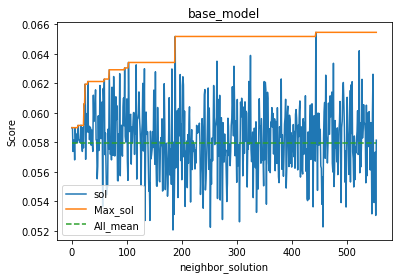

In [159]:
q_plot = []
x_plot = []
max_plt = []
mean_plt=[]
for i in range(len(graph_dot)):
    q_plot.append(graph_dot[i])
    x_plot.append(i)
    max_plt.append(max(q_plot))
    mean_plt.append(0.05793219386042783)
plt.figure()
plt.plot(x_plot, q_plot,label = 'sol')
plt.plot(x_plot, max_plt, label = 'Max_sol')
plt.plot(x_plot, mean_plt,label = 'All_mean',linestyle = '--')

plt.xlabel('neighbor_solution')
plt.ylabel('Score')
plt.title('base_model')
plt.legend()
plt.show()

In [172]:

graph_dot = []
tag_num_tabu = []
for i in tqdm_notebook(range(1,6)):
    print(i)
    
    tag_num_tabu = []
    sol_l = []
    sol_s = []
    glo_sol = []
    glo_scr = []
    real_sol = []
    real_scr = []
    flg=True
    cnt = 0
    cnt2 = 0
    while(flg):
        cnt+=1
        if cnt == 1:
            insol = Make_insol(i)
            nbr = Make_neighbor_sol(insol,60*i)
            
        else:
            insol = sol_l[sol_s.index(max(sol_s))]
            nbr = Make_neighbor_sol(insol,60*i)
#         print(nbr)
        ##여기서 겹치는거 거를까?
        sol_l = []
        sol_s = []
        #######여기서 nbr 열망함수 적용 
        for j in tqdm_notebook(nbr):
            qq,dd = Select_data(j,data)
            if qq < base_score:
                print('열망걸림')
                continue
            b_nbr = Make_valneighbor(j, 8)
            
            sol = find_local_sol(b_nbr)
            if sol : 
                
                a,b = Select_data(sol,data)
                graph_dot.append(a)
                sol_l.append(sol)
                sol_s.append(a)
                
        if len(sol_s):
            s = max(sol_s)
            
#         print(sol_l)
            if cnt >= 2 :
            
#             print(len(sol_s),max(sol_s),sol_s)
                if max(glo_scr) >= s:
                    cnt2 += 1
                    if cnt2 == 4:
                        flg =False
            else:
                cnt2 = 0
        else :
            continue        
        print(cnt2)
      
        glo_sol.append(sol_l[sol_s.index(s)])
        glo_scr.append(s)
#         print(glo_scr)
        print(max(glo_scr))
        print(glo_sol[glo_scr.index(max(glo_scr))])

1


열망걸림
열망걸림
열망걸림
열망걸림
열망걸림
열망걸림
열망걸림
열망걸림
열망걸림
열망걸림
열망걸림


KeyboardInterrupt: 

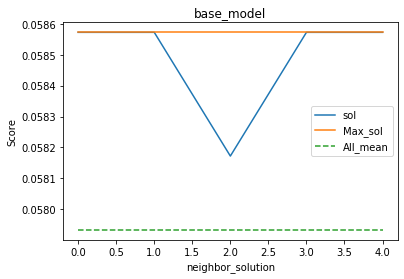

In [168]:
q_plot = []
x_plot = []
max_plt = []
mean_plt=[]
for i in range(len(graph_dot)):
    q_plot.append(graph_dot[i])
    x_plot.append(i)
    max_plt.append(max(q_plot))
    mean_plt.append(0.05793219386042783)
plt.figure()
plt.plot(x_plot, q_plot,label = 'sol')
plt.plot(x_plot, max_plt, label = 'Max_sol')
plt.plot(x_plot, mean_plt,label = 'All_mean',linestyle = '--')

plt.xlabel('neighbor_solution')
plt.ylabel('Score')
plt.title('base_model')
plt.legend()
plt.show()

In [177]:
## 타부 겹치는거 빼기
graph_dot = []
tag_num_tabu = []
for i in tqdm_notebook(range(1,6)):
    print(i)
    
    tag_num_tabu = []
    sol_l = []
    sol_s = []
    glo_sol = []
    glo_scr = []
    real_sol = []
    real_scr = []
    flg=True
    cnt = 0
    cnt2 = 0
    while(flg):
        cnt+=1
        if cnt == 1:
            insol = Make_insol(i)
            nbr = Make_neighbor_sol(insol,60*(i*i))
            
        else:
            insol = sol_l[sol_s.index(max(sol_s))]
            nbr = Make_neighbor_sol(insol,60*(i*i))
#         print(nbr)
        ##여기서 겹치는거 거를까?
        sol_l = []
        sol_s = []
        #######여기서 nbr 열망함수 적용 
        nbr = check_nbr(nbr,data)
        for j in tqdm_notebook(nbr):
            
            b_nbr = Make_valneighbor(j, 8*i)
            
            sol = find_local_sol(b_nbr)
            if sol : 
                
                a,b = Select_data(sol,data)
                graph_dot.append(a)
                sol_l.append(sol)
                sol_s.append(a)
                
        if len(sol_s):
            s = max(sol_s)
            
#         print(sol_l)
            if cnt >= 2 :
            
#             print(len(sol_s),max(sol_s),sol_s)
                if max(glo_scr) >= s:
                    cnt2 += 1
                    if cnt2 == 3:
                        flg =False
            else:
                cnt2 = 0
        else :
            continue        
        print(cnt2)
      
        glo_sol.append(sol_l[sol_s.index(s)])
        glo_scr.append(s)
#         print(glo_scr)
        print(max(glo_scr))
        print(glo_sol[glo_scr.index(max(glo_scr))])

1
0.05821305473895727 24043 [[1, 6, 4]]
0.05813838530255723 7529 [[1, 42, 9]]
0.05833745870300873 12768 [[1, 38, 6]]
0.05840363750359888 42517 [[1, 1, 3]]
0.059624553107673096 2236 [[1, 15, 9]]
0.05824812779506159 31433 [[1, 26, 2]]
0.05908423706556715 202 [[1, 2, 9]]
0.058029417103066805 16684 [[1, 45, 8]]
0.058885674169003525 10213 [[1, 26, 4]]
0.05820287955272129 46972 [[1, 21, 2]]
0.05863453409415251 1424 [[1, 3, 9]]
0.058539733565199724 17289 [[1, 16, 3]]
0.05832645218720948 8576 [[1, 36, 8]]
0.05812620608778371 15259 [[1, 23, 5]]
0.06527878296552374 98 [[1, 29, 10]]
0.05822469151971874 41916 [[1, 44, 4]]
0.05920881989374303 1598 [[1, 36, 10]]
0.05872581951121084 2517 [[1, 24, 8]]
0.0580142272054688 43877 [[1, 34, 6]]
0.06208552569368171 1210 [[1, 46, 9]]


0
0.05915071862273937
[[1, 26, 10]]
0.05803533436513348 23884 [[1, 4, 6]]
0.05794859623981704 33019 [[1, 44, 5]]
0.05867104510522767 27012 [[1, 17, 6]]
0.05876068449646824 6040 [[1, 33, 8]]
0.06208552569368171 1210 [[1, 46, 9]]
0.05831921782125713 21839 [[1, 1, 6]]
0.05813838530255723 7529 [[1, 42, 9]]
0.05915071862273937 1050 [[1, 26, 10]]
0.0579400949473468 65242 [[1, 45, 3]]
0.058095156969844186 16808 [[1, 30, 6]]
0.05884536619865997 4718 [[1, 33, 9]]
0.0580142272054688 43877 [[1, 34, 6]]
0.05803065159412031 30187 [[1, 4, 5]]
0.05798602092896048 13759 [[1, 42, 7]]
0.05822420902380835 20702 [[1, 39, 7]]
0.05808839784517219 49717 [[1, 4, 3]]
0.058970105974338445 6126 [[1, 15, 5]]
0.06208552569368171 1210 [[1, 46, 9]]
0.058640042310649634 4941 [[1, 28, 8]]
0.058228433767305667 54059 [[1, 44, 3]]
0.05942718304307803 2074 [[1, 32, 10]]


1
0.05915071862273937
[[1, 26, 10]]
0.05853094491404242 14941 [[1, 1, 8]]
0.06065663157037615 2485 [[1, 26, 8]]
0.0579400949473468 65242 [[1, 45, 3]]
0.05822469151971874 41916 [[1, 44, 4]]
0.05832255683235326 32562 [[1, 1, 4]]
0.0604452569392246 1769 [[1, 26, 9]]
0.05829759352025903 43543 [[1, 10, 3]]
0.058122777695533895 32411 [[1, 49, 8]]
0.05903132327757501 8789 [[1, 30, 8]]
0.058029417103066805 16684 [[1, 45, 8]]
0.058640042310649634 4941 [[1, 28, 8]]
0.058692562966062616 3594 [[1, 43, 4]]
0.05799719220525016 48126 [[1, 38, 2]]
0.059277771630009496 6264 [[1, 30, 9]]
0.05817200146554293 946 [[1, 47, 5]]
0.058210334013979376 60369 [[1, 1, 2]]
0.05819035137912476 22647 [[1, 38, 4]]
0.05797042349201849 15586 [[1, 32, 3]]
0.058122777695533895 32411 [[1, 49, 8]]
0.05829759352025903 43543 [[1, 10, 3]]
0.057998152019791055 26653 [[1, 15, 2]]
0.05793649090401828 56934 [[1, 36, 3]]
0.05916309524417413 7735 [[1, 33, 7]]
0.058230078145894135 40244 [[1, 49, 7]]
0.05835571744953939 2055 [[1, 3, 

2
0.05915071862273937
[[1, 26, 10]]
0.05869527512182422 588 [[1, 47, 6]]
0.05794810961874903 84408 [[1, 20, 2]]
0.05869994207349709 15838 [[1, 49, 10]]
0.05876417211191684 9388 [[1, 45, 9]]
0.057978789999137165 55668 [[1, 49, 5]]
0.05808839784517219 49717 [[1, 4, 3]]
0.05811693387635784 10234 [[1, 33, 6]]
0.057978789999137165 55668 [[1, 49, 5]]
0.058970105974338445 6126 [[1, 15, 5]]
0.05877365102657611 4050 [[1, 36, 9]]
0.05865693203959463 4447 [[1, 40, 10]]
0.057978789999137165 55668 [[1, 49, 5]]
0.0604452569392246 1769 [[1, 26, 9]]
0.0579400949473468 65242 [[1, 45, 3]]
0.059108791455710456 11214 [[1, 17, 9]]
0.05810737978626634 28661 [[1, 24, 2]]
0.05822469151971874 41916 [[1, 44, 4]]


3
0.05915071862273937
[[1, 26, 10]]
2


c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


0.05826326785056478 7634 [[1, 14, 6], [0, 4, 5]]
0.058896688046409566 4314 [[1, 33, 9], [0, 36, 8]]


c:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


0.05953258511364095 2697 [[1, 34, 9], [0, 25, 3]]
0.05843983264823645 15224 [[1, 16, 3], [0, 43, 2]]
0.05948054154405905 57 [[1, 29, 6], [1, 30, 8]]
0.058532000195143395 18164 [[1, 44, 7], [0, 3, 8]]
0.05909884701471949 1482 [[1, 21, 6], [1, 39, 9]]
0.05798719935946204 14358 [[1, 25, 8], [0, 17, 2]]
0.058001086615700484 51511 [[1, 12, 2], [0, 14, 4]]
0.06360038973501518 230 [[1, 32, 8], [1, 4, 9]]
0.058038293265381714 10250 [[1, 5, 1], [1, 42, 8]]
0.05876916041705411 7230 [[1, 7, 3], [1, 38, 4]]
0.05975006842484386 5696 [[1, 16, 1], [1, 16, 7]]
0.05794907082094712 63480 [[1, 45, 3], [0, 22, 10]]
0.05836197713397976 4063 [[1, 26, 3], [1, 12, 6]]
0.057968753441491966 96522 [[1, 19, 1], [0, 4, 10]]
0.05806398726268198 8379 [[1, 44, 9], [1, 25, 1]]
0.05961171791378999 206 [[1, 15, 7], [1, 43, 3]]
0.05807135243033093 12251 [[1, 41, 4], [0, 46, 4]]
0.05797074123177356 95378 [[1, 2, 1], [0, 42, 10]]
0.05977497504978977 661 [[1, 33, 8], [1, 22, 5]]
0.05954348254412677 1439 [[1, 16, 9], [1, 21,

0
0.062203118793026944
[[1, 46, 9], [0, 11, 7]]
0.05915693829354612 164 [[1, 2, 9], [1, 25, 5]]
0.05846650239883221 21760 [[1, 17, 5], [1, 9, 4]]
0.061733925457691505 370 [[1, 37, 8], [1, 16, 8]]
0.05870447390494455 3528 [[1, 40, 9], [1, 39, 3]]
0.05816354854722295 34921 [[1, 25, 2], [0, 8, 2]]
0.05849981864155237 1287 [[1, 43, 4], [1, 37, 4]]
0.05869549408176215 458 [[1, 48, 10], [0, 40, 8]]
0.05901903195348493 1073 [[1, 36, 10], [1, 9, 4]]
0.0582951890171372 11694 [[1, 30, 7], [0, 18, 8]]
0.058228433767305667 54059 [[1, 1, 1], [1, 44, 3]]
0.06592118072086742 303 [[1, 32, 9], [1, 16, 4]]
0.05800684748987367 91812 [[1, 42, 1], [0, 7, 8]]
0.05822470571575884 2874 [[1, 38, 5], [1, 30, 6]]
0.057977081139683535 16841 [[1, 34, 10], [0, 10, 7]]
0.05798169364037993 11143 [[1, 28, 5], [0, 17, 10]]
0.05972883095847282 2019 [[1, 24, 4], [0, 34, 2]]
0.0579512603184629 10674 [[1, 17, 4], [1, 1, 5]]
0.05829607659740581 35949 [[1, 49, 4], [0, 31, 3]]
0.05868969314329113 2857 [[1, 28, 8], [1, 36, 3]]

0
0.06313793545690911
[[1, 7, 10], [1, 28, 3]]
0.0580965468582592 794 [[1, 8, 10], [1, 18, 3]]
0.057995206599779914 62308 [[1, 12, 2], [0, 23, 10]]
0.058777521309753125 2909 [[1, 30, 6], [1, 16, 3]]
0.05854181259713285 609 [[1, 2, 5], [1, 43, 1]]
0.058655642132267365 5646 [[1, 38, 7], [0, 22, 2]]
0.06042261965115214 350 [[1, 23, 7], [1, 10, 10]]
0.0580950813764575 33557 [[1, 49, 7], [0, 26, 3]]
0.05796466530031078 97564 [[1, 28, 1], [0, 5, 10]]
0.0586855033249524 606 [[1, 2, 5], [0, 46, 9]]
0.05904274086974356 581 [[1, 38, 8], [1, 37, 8]]
0.05970027631891528 842 [[1, 14, 6], [1, 42, 9]]
0.07305128987198783 97 [[1, 24, 7], [1, 15, 9]]
0.057987385464432564 1063 [[1, 24, 9], [1, 24, 8]]
0.05849263560894647 1110 [[1, 5, 10], [0, 27, 5]]
0.05805195029643935 11375 [[1, 36, 3], [1, 3, 3]]
0.058349907541695244 18532 [[1, 6, 4], [0, 28, 3]]
0.05797464396243774 57705 [[1, 20, 4], [0, 22, 6]]
0.058348637916926224 21735 [[1, 1, 6], [0, 29, 7]]
0.05822104110218634 59743 [[1, 49, 2], [0, 9, 8]]
0.05

1
0.06313793545690911
[[1, 7, 10], [1, 28, 3]]
0.0582737949647183 88 [[1, 8, 3], [1, 0, 9]]
0.061778218007109836 297 [[1, 47, 8], [1, 1, 1]]
0.05803204532944592 4781 [[1, 32, 6], [0, 42, 10]]
0.05796220908516622 98435 [[1, 18, 1], [0, 29, 4]]
0.058109301619506525 37851 [[1, 34, 6], [0, 39, 9]]
0.062008219841900976 1705 [[1, 15, 7], [1, 34, 5]]
0.06217670833347054 198 [[1, 43, 2], [1, 36, 10]]
0.058158329265531904 41219 [[1, 49, 5], [0, 45, 7]]
0.06310024842261562 166 [[1, 27, 7], [1, 47, 7]]
0.05800574819213059 62414 [[1, 26, 1], [0, 45, 6]]
0.05856499203177289 15536 [[1, 24, 3], [0, 41, 9]]
0.05799719220525016 48126 [[1, 22, 1], [1, 38, 2]]
0.06062211600952686 865 [[1, 37, 10], [1, 14, 3]]
0.058155274763348454 5060 [[1, 31, 9], [1, 31, 5]]
0.05811367614866813 1708 [[1, 20, 10], [0, 32, 4]]
0.058068919499432534 7270 [[1, 25, 8], [1, 24, 3]]
0.05797871212663906 49938 [[1, 20, 4], [0, 21, 4]]
0.058482937869089945 12523 [[1, 1, 9], [1, 40, 1]]
0.05831055478754156 13393 [[1, 33, 5], [1, 43

2
0.06313793545690911
[[1, 7, 10], [1, 28, 3]]
0.059747373939102594 1937 [[1, 26, 5], [0, 27, 3]]
0.05797279354703029 99061 [[1, 38, 1], [0, 18, 10]]
0.058149195129146264 19505 [[1, 10, 4], [0, 39, 4]]
0.05803271560095341 198 [[1, 29, 2], [1, 40, 10]]
0.058245188724759554 50494 [[1, 20, 2], [0, 27, 7]]
0.05831114675973217 21187 [[1, 6, 4], [0, 8, 7]]
0.05867690069001947 384 [[1, 47, 7], [0, 43, 7]]
0.05812620608778371 15259 [[1, 23, 5], [1, 18, 1]]
0.05823285645357141 6766 [[1, 33, 6], [0, 20, 7]]
0.060551211333988005 93 [[1, 47, 4], [1, 47, 10]]
0.057998090742852046 12125 [[1, 12, 1], [1, 23, 6]]
0.05959839132668018 965 [[1, 39, 9], [1, 4, 9]]
0.058032376457005756 13039 [[1, 1, 6], [0, 27, 7]]
0.059568265200277054 4 [[1, 2, 8], [1, 15, 8]]
0.05985644350749941 2290 [[1, 8, 8], [1, 40, 3]]
0.05867033407467948 3290 [[1, 44, 10], [0, 28, 5]]
0.05801348608494958 4544 [[1, 7, 6], [1, 6, 3]]
0.05794653219383339 10954 [[1, 14, 6], [1, 6, 1]]
0.05800205657341736 1620 [[1, 41, 5], [1, 17, 8]]
0

3
0.06313793545690911
[[1, 7, 10], [1, 28, 3]]
3
0.05806237038535511 76339 [[1, 19, 1], [0, 43, 7], [0, 28, 3]]
0.060319803266264814 1127 [[1, 8, 3], [0, 11, 2], [1, 31, 8]]
0.05914544439385541 91 [[1, 22, 6], [1, 46, 4], [1, 6, 8]]
0.05822949145303233 1545 [[1, 4, 10], [0, 31, 7], [1, 6, 2]]
0.05991555474332425 2637 [[1, 15, 8], [1, 15, 1], [0, 45, 10]]
0.06186698315927719 328 [[1, 26, 8], [0, 40, 8], [0, 25, 4]]
0.06223782579221447 480 [[1, 16, 7], [1, 11, 9], [1, 37, 1]]
0.058982965480012195 123 [[1, 28, 10], [1, 39, 1], [1, 43, 2]]
0.05812627214990706 32506 [[1, 6, 3], [0, 14, 8], [1, 29, 1]]
0.0595288808435721 584 [[1, 20, 8], [1, 23, 10], [0, 27, 10]]
0.06652303185794287 40 [[1, 31, 9], [1, 47, 2], [1, 29, 2]]
0.05857870612460998 14701 [[1, 38, 5], [0, 9, 10], [1, 11, 1]]
0.06040468100324685 313 [[1, 23, 5], [0, 26, 3], [1, 5, 10]]
0.061203967740307966 136 [[1, 47, 9], [0, 35, 3], [0, 46, 5]]
0.060206005412245696 3014 [[1, 47, 1], [1, 31, 8], [0, 25, 7]]
0.061476133817322275 1009

0.05866837373149845 14179 [[1, 16, 2], [1, 8, 2], [0, 49, 9]]
0.05855880462457961 470 [[1, 8, 9], [0, 19, 2], [1, 17, 5]]
0.06090649475885825 196 [[1, 44, 9], [1, 13, 9], [0, 27, 4]]
0.05823252990949336 17137 [[1, 34, 8], [0, 8, 3], [1, 38, 1]]
0.0636926553327744 61 [[1, 43, 10], [1, 49, 2], [0, 15, 3]]
0.05799901039495085 585 [[1, 23, 6], [1, 38, 9], [0, 0, 10]]
0.0601152671949167 16 [[1, 34, 6], [1, 22, 10], [1, 48, 8]]
0.061341901648032285 2455 [[1, 41, 4], [0, 31, 4], [1, 38, 4]]
0.06352865096306376 163 [[1, 47, 1], [1, 46, 9], [1, 39, 9]]
0.05795186452996771 5926 [[1, 25, 5], [1, 13, 8], [0, 8, 9]]
0.05947126432862757 165 [[1, 29, 8], [1, 27, 6], [1, 46, 1]]
0.05882873697747275 2410 [[1, 26, 6], [0, 36, 7], [1, 9, 5]]
0.05858349627225993 1866 [[1, 12, 5], [0, 35, 4], [1, 41, 6]]
0.05804137692623772 46038 [[1, 19, 2], [0, 3, 10], [0, 38, 3]]
0.05816022886671728 145 [[1, 37, 2], [1, 2, 8], [0, 17, 5]]
0.058139908525349546 16910 [[1, 13, 2], [0, 5, 4], [0, 25, 7]]
0.06022120810900056

0
0.06619827909585084
[[1, 15, 3], [0, 36, 6], [1, 38, 7]]
0.05922400124885645 389 [[1, 32, 5], [1, 31, 3], [1, 7, 6]]
0.05815611746245249 3304 [[1, 19, 8], [0, 8, 6], [1, 9, 6]]
0.05812179744154107 8249 [[1, 17, 8], [1, 27, 5], [0, 26, 8]]
0.0595457348789824 7394 [[1, 44, 8], [0, 17, 4], [0, 36, 9]]
0.05821938607042883 76384 [[1, 11, 1], [0, 13, 4], [0, 2, 4]]
0.05816529564361652 284 [[1, 27, 5], [1, 17, 7], [1, 0, 3]]
0.06464579204016115 21 [[1, 5, 6], [1, 2, 9], [1, 16, 1]]
0.05881965881042315 772 [[1, 17, 10], [0, 20, 6], [0, 25, 5]]
0.05829786458274894 51826 [[1, 49, 4], [0, 9, 10], [0, 37, 9]]
0.0637162084684483 463 [[1, 34, 6], [1, 43, 1], [1, 26, 10]]
0.06189138491368948 144 [[1, 29, 7], [1, 23, 2], [0, 40, 3]]
0.064888659718582 51 [[1, 6, 9], [1, 29, 4], [0, 32, 8]]
0.06328070209562335 114 [[1, 4, 3], [1, 30, 9], [1, 26, 7]]
0.05866210459734458 57 [[1, 16, 9], [0, 38, 2], [1, 37, 10]]
0.058644079042265755 1040 [[1, 16, 5], [0, 16, 6], [0, 21, 2]]
0.06252247121417716 1183 [[1, 

0.058510672511218824 14896 [[1, 34, 1], [1, 34, 10], [0, 39, 6]]
0.057948926676206734 38175 [[1, 20, 3], [0, 40, 2], [0, 40, 4]]
0.05800395668761738 521 [[1, 18, 5], [1, 9, 9], [0, 27, 2]]
0.05950638708415131 697 [[1, 12, 10], [0, 37, 10], [1, 38, 5]]
0.063647619987247 112 [[1, 13, 8], [0, 36, 4], [1, 15, 9]]
0.09450789837655767 4 [[1, 41, 10], [1, 48, 9], [1, 1, 2]]
0.05871738381805316 448 [[1, 43, 3], [1, 13, 7], [0, 28, 3]]
0.05843407319813781 11193 [[1, 16, 2], [0, 40, 9], [1, 49, 7]]
0.06554262565677639 334 [[1, 30, 2], [1, 15, 2], [1, 8, 10]]
0.058064380431909125 3052 [[1, 5, 1], [0, 43, 6], [1, 16, 9]]
0.08899111830361033 16 [[1, 30, 6], [1, 34, 10], [1, 47, 7]]
0.05893968229195753 11886 [[1, 16, 3], [0, 13, 6], [0, 9, 9]]
0.05832368223560707 9154 [[1, 46, 3], [0, 43, 10], [1, 21, 3]]
0.058649274661524545 7180 [[1, 7, 2], [0, 47, 8], [1, 47, 2]]
0.05848770362257319 6559 [[1, 42, 1], [0, 3, 2], [1, 17, 9]]
0.06489084346509602 15 [[1, 17, 9], [1, 45, 9], [1, 43, 7]]
0.059344346358

1
0.06619827909585084
[[1, 15, 3], [0, 36, 6], [1, 38, 7]]
0.12729238154240213 2 [[1, 14, 5], [1, 33, 8], [1, 0, 10]]
0.05874460448062111 1189 [[1, 38, 6], [0, 4, 8], [1, 5, 6]]
0.0582877666108773 11429 [[1, 9, 1], [1, 38, 6], [0, 42, 8]]
0.0629862763399471 202 [[1, 47, 5], [0, 41, 10], [1, 7, 4]]
0.05802980701972176 2861 [[1, 5, 6], [0, 7, 10], [1, 4, 5]]
0.05832266109581632 9676 [[1, 38, 6], [0, 2, 5], [0, 8, 5]]
0.05802462485529385 13474 [[1, 10, 1], [0, 19, 10], [1, 42, 7]]
0.05820896093032072 65452 [[1, 44, 1], [0, 37, 6], [0, 5, 4]]
0.06454431018258106 88 [[1, 7, 4], [1, 26, 10], [0, 27, 4]]
0.08148534670098272 11 [[1, 10, 5], [1, 23, 7], [1, 29, 8]]
0.05815802780431436 32078 [[1, 34, 1], [1, 49, 8], [0, 3, 10]]
0.05799239446382371 5637 [[1, 21, 2], [0, 43, 3], [1, 6, 6]]
0.06066626535628113 861 [[1, 17, 10], [1, 22, 4], [0, 25, 10]]
0.06190085330576305 9 [[1, 32, 6], [0, 39, 8], [1, 0, 9]]
0.06140099776059487 477 [[1, 28, 4], [1, 13, 8], [0, 49, 4]]
0.06083726694909009 235 [[1, 

0.06761495903278583 115 [[1, 22, 9], [1, 32, 7], [0, 1, 6]]
0.07135997543023226 6 [[1, 18, 8], [1, 16, 10], [1, 13, 10]]
0.06422180249239148 16 [[1, 1, 9], [1, 23, 8], [1, 29, 4]]
0.058276676349024496 274 [[1, 2, 7], [0, 44, 6], [0, 29, 2]]
0.05796908114314662 9626 [[1, 49, 4], [1, 4, 3], [1, 46, 3]]
0.0586924780817676 10282 [[1, 1, 8], [0, 48, 3], [1, 27, 2]]
0.059143154986104104 2106 [[1, 28, 4], [0, 42, 5], [1, 45, 8]]
0.05900970534630794 1907 [[1, 17, 6], [1, 14, 7], [0, 26, 5]]
0.06091246734480114 499 [[1, 26, 2], [1, 14, 7], [1, 35, 3]]
0.058855288925742565 14740 [[1, 38, 1], [0, 42, 10], [1, 17, 8]]
0.059415283176659485 108 [[1, 2, 2], [0, 33, 3], [1, 48, 6]]
0.0583662842366907 5254 [[1, 34, 9], [1, 17, 7], [0, 0, 6]]
0.10023458868119006 7 [[1, 28, 9], [1, 2, 4], [1, 27, 9]]
0.057971006166405326 3146 [[1, 42, 2], [1, 14, 7], [0, 32, 2]]
0.08539023372955944 39 [[1, 32, 9], [1, 37, 10], [1, 18, 2]]
0.06002938438291067 459 [[1, 24, 7], [1, 17, 7], [0, 45, 5]]
0.05945719511151941 24

2
0.06619827909585084
[[1, 15, 3], [0, 36, 6], [1, 38, 7]]
0.05818361268831215 6609 [[1, 12, 2], [0, 43, 5], [1, 7, 7]]
0.060708377207427736 1109 [[1, 12, 8], [1, 25, 5], [1, 33, 6]]
0.05897635721228041 5727 [[1, 49, 4], [1, 3, 3], [0, 45, 4]]
0.06270383540442644 410 [[1, 35, 9], [1, 36, 7], [1, 20, 6]]
0.05833032364316699 9280 [[1, 37, 1], [1, 19, 5], [0, 45, 3]]
0.05906730158185494 5792 [[1, 18, 1], [1, 30, 9], [0, 5, 7]]
0.058067326512229116 14761 [[1, 6, 4], [0, 44, 7], [0, 18, 4]]
0.06204349389371944 479 [[1, 33, 3], [0, 49, 7], [1, 15, 8]]
0.058262735954395184 10271 [[1, 15, 3], [0, 36, 9], [0, 40, 4]]
0.05795476409062679 78937 [[1, 19, 1], [0, 10, 7], [0, 42, 10]]
0.05818943829980669 11946 [[1, 15, 1], [1, 10, 8], [0, 18, 7]]
0.06755726754817963 15 [[1, 48, 7], [1, 2, 4], [0, 6, 10]]
0.06145248148534552 1483 [[1, 24, 3], [1, 31, 7], [0, 40, 5]]
0.05806971053767349 6321 [[1, 27, 3], [0, 4, 4], [1, 40, 6]]
0.06721189149249315 119 [[1, 27, 9], [1, 30, 10], [1, 4, 8]]
0.058816080794

0.06938943276214157 68 [[1, 17, 10], [1, 3, 9], [0, 49, 8]]
0.058360401347663515 5861 [[1, 0, 2], [0, 4, 10], [0, 26, 8]]
0.05795551250306463 31490 [[1, 34, 7], [0, 2, 9], [0, 37, 7]]
0.0641257784889255 25 [[1, 19, 8], [1, 32, 9], [1, 35, 4]]
0.09348954368367135 22 [[1, 32, 4], [1, 37, 9], [1, 24, 7]]
0.10147555566259026 5 [[1, 14, 10], [1, 29, 8], [1, 25, 6]]
0.05971337097984891 1447 [[1, 44, 6], [1, 0, 2], [0, 30, 7]]
0.058284807353649416 5683 [[1, 23, 1], [1, 23, 7], [0, 5, 2]]
0.06174145555342385 113 [[1, 31, 10], [1, 39, 9], [1, 1, 6]]
0.05825361555007714 945 [[1, 20, 6], [0, 35, 5], [1, 16, 10]]
0.06276914330192847 297 [[1, 32, 3], [0, 38, 5], [1, 16, 10]]
0.05823681729870935 38502 [[1, 5, 1], [0, 16, 8], [1, 49, 7]]
0.05798140521402339 4207 [[1, 23, 1], [0, 7, 9], [1, 2, 2]]
0.05912156776310333 1737 [[1, 30, 3], [1, 40, 10], [0, 0, 10]]
0.05829539896583907 1864 [[1, 10, 2], [1, 16, 9], [0, 0, 8]]
0.05811271330776128 19028 [[1, 39, 7], [0, 32, 8], [0, 31, 9]]
0.05852251806366995 

3
0.06619827909585084
[[1, 15, 3], [0, 36, 6], [1, 38, 7]]
4
0.058329447825181936 12069 [[1, 26, 3], [0, 23, 4], [0, 29, 2], [0, 47, 3]]
0.06187875682018018 150 [[1, 14, 10], [0, 6, 7], [1, 8, 1], [0, 9, 2]]
0.06128990988615944 1033 [[1, 21, 8], [1, 43, 1], [0, 42, 3], [0, 31, 2]]
0.08992237090341655 3 [[1, 29, 3], [1, 3, 5], [0, 25, 7], [1, 4, 9]]
0.06252076694991918 453 [[1, 11, 9], [1, 26, 3], [0, 4, 2], [1, 11, 4]]
0.060307673067150486 2351 [[1, 16, 2], [0, 45, 10], [0, 36, 2], [1, 1, 4]]
0.08037447853710833 1 [[1, 43, 9], [1, 9, 2], [1, 21, 10], [1, 15, 3]]
0.05801747579578072 2513 [[1, 24, 5], [0, 4, 3], [1, 9, 1], [0, 20, 7]]
0.059914010438947535 372 [[1, 5, 4], [1, 38, 1], [1, 15, 5], [1, 34, 7]]
0.06047700821648673 402 [[1, 39, 6], [0, 30, 4], [1, 8, 10], [0, 2, 8]]
0.05985710106578851 1166 [[1, 6, 2], [0, 4, 10], [0, 25, 2], [1, 20, 6]]
0.0631147213522534 5 [[1, 17, 9], [1, 22, 7], [1, 32, 10], [0, 42, 8]]
0.057963938057878646 6539 [[1, 7, 5], [0, 28, 7], [0, 20, 6], [0, 9, 9

0.05795164290816981 19590 [[1, 37, 4], [0, 23, 5], [0, 21, 3], [0, 33, 6]]
0.06040106044936819 725 [[1, 8, 7], [1, 7, 1], [1, 10, 1], [1, 30, 9]]
0.0585338456227724 1209 [[1, 27, 3], [0, 45, 5], [1, 17, 4], [1, 42, 9]]
0.06579983005080371 31 [[1, 39, 6], [1, 43, 5], [1, 17, 9], [0, 25, 7]]
0.06959387443464404 5 [[1, 43, 7], [1, 22, 9], [1, 9, 2], [1, 23, 5]]
0.05832292397485869 2126 [[1, 47, 3], [1, 46, 1], [0, 30, 9], [0, 13, 2]]
0.058557042533019014 7428 [[1, 10, 1], [0, 48, 3], [1, 38, 7], [0, 22, 9]]
0.05869614047982922 489 [[1, 32, 8], [0, 11, 9], [1, 17, 7], [1, 25, 3]]
0.05889039228222516 10892 [[1, 44, 7], [0, 27, 7], [0, 43, 9], [0, 20, 10]]
0.06228908288110911 222 [[1, 6, 9], [0, 23, 6], [0, 20, 9], [1, 26, 5]]
0.06022922296140611 250 [[1, 40, 5], [0, 46, 6], [1, 5, 2], [1, 11, 10]]
0.05796299256274003 9806 [[1, 19, 4], [0, 16, 6], [1, 4, 5], [0, 22, 8]]
0.060840559959594254 2157 [[1, 16, 7], [0, 42, 2], [0, 24, 7], [0, 42, 2]]
0.05874637627787385 1574 [[1, 8, 8], [1, 42, 4],

0.062666884425604 732 [[1, 39, 4], [1, 40, 10], [1, 4, 3], [0, 23, 4]]
0.05875816546067715 2171 [[1, 18, 6], [0, 10, 10], [1, 1, 5], [0, 46, 5]]
0.06257149415135432 114 [[1, 13, 8], [0, 0, 2], [1, 20, 10], [0, 28, 5]]
0.05851455387302322 21976 [[1, 44, 4], [0, 42, 4], [0, 49, 10], [0, 3, 4]]
0.06966697913240211 2 [[1, 30, 6], [1, 15, 7], [1, 29, 8], [0, 30, 10]]
0.05920780613081495 188 [[1, 29, 8], [1, 29, 7], [0, 33, 8], [0, 17, 4]]
0.058787762828595595 6363 [[1, 4, 2], [1, 43, 2], [0, 10, 8], [0, 44, 9]]
0.0721439827535747 27 [[1, 39, 8], [1, 2, 9], [0, 47, 6], [0, 46, 3]]
0.060024194369584116 620 [[1, 1, 8], [1, 47, 1], [0, 36, 7], [1, 26, 6]]
0.08230398524447281 10 [[1, 2, 5], [0, 30, 7], [1, 48, 7], [0, 29, 8]]
0.11354004844807807 19 [[1, 41, 5], [1, 16, 6], [0, 24, 7], [1, 32, 8]]
0.05848852342622755 4179 [[1, 45, 8], [0, 17, 3], [0, 13, 8], [0, 23, 2]]
0.10290938093809082 13 [[1, 36, 6], [1, 31, 10], [1, 15, 8], [0, 20, 7]]
0.060441707797183275 395 [[1, 16, 7], [0, 2, 4], [0, 31

0
0.06354467785855303
[[1, 13, 9], [0, 29, 10], [0, 3, 9], [1, 16, 3]]
0.16772505332095897 3 [[1, 38, 10], [1, 27, 6], [1, 30, 9], [1, 22, 6]]
0.057934592216236785 27806 [[1, 23, 1], [0, 33, 5], [0, 11, 2], [0, 7, 10]]
0.06791445000041539 59 [[1, 29, 10], [0, 41, 2], [0, 33, 6], [1, 12, 1]]
0.05852808551934083 1416 [[1, 40, 6], [0, 16, 10], [1, 25, 6], [1, 44, 8]]
0.061723755937546705 865 [[1, 16, 4], [1, 10, 9], [0, 12, 8], [0, 21, 9]]
0.060858171028989556 1142 [[1, 20, 2], [1, 21, 6], [1, 1, 9], [1, 1, 5]]
0.06425615306263775 77 [[1, 16, 10], [1, 28, 4], [0, 24, 9], [1, 36, 6]]
0.05796291496935117 15339 [[1, 49, 7], [0, 17, 4], [1, 11, 2], [0, 33, 10]]
0.058336956820016335 12124 [[1, 27, 1], [1, 30, 4], [1, 44, 4], [1, 44, 4]]
0.05811551791569473 235 [[1, 7, 9], [1, 6, 9], [0, 5, 6], [0, 19, 10]]
0.06285603140272902 124 [[1, 43, 9], [1, 10, 1], [1, 31, 2], [0, 34, 7]]
0.059169251921745526 83 [[1, 8, 5], [0, 14, 3], [0, 34, 2], [1, 3, 7]]
0.0642480343092074 380 [[1, 36, 4], [0, 35, 7]

0.05872187400538252 2738 [[1, 15, 2], [1, 8, 2], [1, 38, 5], [0, 33, 9]]
0.05803145030479097 3889 [[1, 30, 4], [1, 37, 7], [0, 41, 10], [1, 37, 3]]
0.05825820574118407 1516 [[1, 34, 2], [1, 13, 10], [0, 19, 5], [1, 39, 3]]
0.05879732980043939 819 [[1, 9, 8], [0, 32, 5], [0, 8, 6], [1, 44, 10]]
0.058111899650331 42780 [[1, 36, 3], [0, 13, 6], [0, 35, 4], [1, 33, 1]]
0.06090700803388328 250 [[1, 39, 3], [1, 9, 8], [1, 29, 4], [0, 2, 8]]
0.06276945426393349 595 [[1, 26, 9], [1, 49, 7], [0, 13, 10], [0, 10, 8]]
0.0619823761142275 411 [[1, 39, 7], [0, 22, 2], [1, 6, 3], [1, 35, 6]]
0.0700718346540121 147 [[1, 40, 10], [0, 39, 4], [1, 8, 1], [1, 17, 10]]
0.07282417638805469 10 [[1, 31, 5], [1, 0, 5], [1, 24, 2], [1, 10, 8]]
0.059038695411740304 2552 [[1, 10, 2], [0, 9, 4], [1, 12, 6], [0, 20, 6]]
0.06380299796843945 288 [[1, 17, 8], [1, 36, 6], [1, 37, 8], [0, 13, 6]]
0.06124199113575553 46 [[1, 9, 6], [1, 26, 10], [1, 12, 9], [0, 21, 7]]
0.05832928344387585 41551 [[1, 38, 1], [1, 10, 3], [1

0.08382719136185601 7 [[1, 48, 6], [1, 41, 4], [0, 25, 7], [1, 21, 9]]
0.07093237996922959 130 [[1, 43, 8], [1, 24, 1], [1, 16, 1], [1, 21, 4]]
0.058138368271972725 2195 [[1, 21, 8], [0, 45, 8], [1, 20, 5], [0, 29, 6]]
0.0631949116743342 497 [[1, 31, 7], [0, 33, 4], [0, 35, 2], [1, 36, 8]]
0.0793605750641019 6 [[1, 20, 4], [1, 43, 8], [1, 3, 3], [1, 46, 7]]
0.058113607778844056 36333 [[1, 25, 3], [1, 4, 2], [0, 33, 10], [0, 28, 2]]
0.05794510652483802 241 [[1, 24, 7], [1, 35, 6], [0, 16, 2], [0, 3, 7]]
0.05966493208320657 1595 [[1, 3, 6], [1, 49, 7], [0, 6, 10], [0, 15, 8]]
0.05916102349726213 354 [[1, 11, 5], [1, 20, 6], [1, 16, 8], [0, 36, 5]]
0.06183790667268656 760 [[1, 35, 2], [1, 30, 9], [1, 12, 4], [0, 7, 9]]
0.058089619698605786 405 [[1, 31, 10], [0, 16, 6], [0, 25, 6], [1, 18, 2]]
0.05820658434760644 11161 [[1, 7, 5], [1, 18, 1], [0, 38, 10], [0, 39, 5]]
0.06581087989942784 41 [[1, 36, 5], [0, 40, 3], [1, 23, 8], [1, 47, 4]]
0.058687607363521604 299 [[1, 36, 9], [0, 19, 2], [0

0
0.06643899467820243
[[1, 17, 10], [1, 32, 3], [0, 18, 8], [0, 14, 5]]
0.06364618391696994 458 [[1, 15, 4], [1, 21, 5], [1, 19, 3], [0, 7, 4]]
0.058309028551941464 313 [[1, 16, 6], [0, 3, 4], [1, 18, 6], [1, 25, 8]]
0.060088055465356886 2264 [[1, 1, 6], [0, 31, 2], [1, 17, 4], [0, 35, 2]]
0.05893904398789015 674 [[1, 37, 8], [1, 28, 3], [0, 18, 2], [0, 1, 7]]
0.0721461997864374 6 [[1, 2, 9], [0, 29, 5], [1, 32, 5], [1, 25, 8]]
0.059374933339500835 1369 [[1, 14, 2], [1, 28, 6], [1, 27, 1], [1, 4, 5]]
0.060405876750932445 956 [[1, 34, 3], [1, 23, 9], [0, 29, 6], [1, 49, 9]]
0.06937017132373964 132 [[1, 45, 9], [1, 25, 2], [1, 36, 10], [0, 7, 8]]
0.06198731349592649 15 [[1, 28, 6], [1, 5, 8], [1, 22, 10], [1, 27, 4]]
0.05842676669345695 659 [[1, 18, 1], [1, 20, 10], [1, 25, 3], [1, 28, 2]]
0.05919872676654486 843 [[1, 15, 8], [0, 36, 10], [1, 39, 5], [1, 30, 1]]
0.06024742400853429 1169 [[1, 1, 4], [1, 25, 6], [1, 26, 6], [0, 18, 9]]
0.06841096480120894 215 [[1, 42, 7], [1, 16, 5], [0, 3

0.06153219720760052 409 [[1, 11, 8], [0, 34, 6], [1, 33, 4], [1, 45, 6]]
0.05863801001583421 8991 [[1, 34, 8], [1, 25, 1], [1, 5, 2], [1, 44, 2]]
0.06375272394854858 2 [[1, 2, 7], [1, 0, 3], [1, 49, 9], [0, 28, 10]]
0.05833079086911628 10017 [[1, 25, 2], [0, 37, 3], [0, 8, 3], [1, 18, 3]]
0.05983868196045324 93 [[1, 14, 9], [1, 24, 1], [1, 32, 4], [1, 26, 2]]
0.06049825981358493 360 [[1, 10, 3], [1, 1, 8], [1, 8, 7], [0, 17, 3]]
0.0579819565717102 43529 [[1, 0, 1], [0, 1, 6], [0, 26, 10], [0, 23, 2]]
0.05893558867983624 2572 [[1, 28, 9], [1, 28, 7], [0, 0, 6], [0, 1, 8]]
0.058778860272938264 1767 [[1, 14, 4], [1, 45, 1], [0, 39, 2], [1, 17, 6]]
0.1053372614676725 5 [[1, 12, 10], [1, 24, 1], [1, 47, 9], [0, 26, 5]]
0.06009743536893631 234 [[1, 14, 6], [1, 27, 7], [0, 15, 5], [1, 5, 8]]
0.060278073645192116 289 [[1, 24, 8], [1, 42, 7], [0, 39, 8], [0, 39, 9]]
0.057990755346168016 42239 [[1, 28, 1], [0, 6, 6], [0, 17, 3], [0, 47, 10]]
0.07222515770443551 6 [[1, 18, 9], [1, 10, 7], [1, 7, 

0.10017341156239769 14 [[1, 45, 6], [1, 46, 10], [1, 23, 3], [0, 10, 3]]
0.07216720207430002 26 [[1, 9, 9], [1, 16, 5], [1, 14, 9], [0, 42, 2]]
0.060346287194731806 690 [[1, 45, 3], [0, 42, 8], [1, 0, 4], [0, 40, 6]]
0.05874871292039094 4324 [[1, 28, 3], [0, 19, 3], [0, 20, 4], [0, 43, 7]]
0.0689012584412126 9 [[1, 7, 9], [1, 15, 4], [0, 37, 2], [1, 13, 10]]
0.06084222697114291 41 [[1, 48, 6], [0, 24, 2], [1, 20, 10], [1, 25, 3]]
0.06348441940296026 80 [[1, 3, 7], [0, 33, 4], [1, 25, 10], [1, 49, 10]]
0.06999327920616188 63 [[1, 15, 5], [0, 6, 3], [1, 16, 7], [1, 31, 4]]
0.05874606014496428 1960 [[1, 10, 4], [0, 39, 3], [1, 40, 6], [0, 9, 10]]
0.08167921120913763 41 [[1, 10, 10], [1, 44, 7], [1, 16, 3], [1, 8, 4]]
0.07455280492247067 40 [[1, 18, 10], [1, 46, 4], [1, 12, 2], [1, 17, 5]]
0.06677899068334833 2 [[1, 26, 3], [1, 30, 2], [0, 25, 3], [1, 0, 8]]
0.05827747870695153 12742 [[1, 44, 7], [0, 36, 9], [1, 7, 1], [1, 27, 3]]
0.060447710380419586 61 [[1, 42, 9], [0, 1, 5], [1, 13, 9],

0.06025445582545474 465 [[1, 42, 1], [1, 3, 6], [1, 39, 6], [1, 36, 4]]
0.059180341753056004 1857 [[1, 40, 5], [1, 37, 4], [1, 49, 8], [0, 16, 5]]
0.058368593400725574 37302 [[1, 37, 1], [0, 37, 8], [0, 9, 6], [0, 18, 5]]
0.05884146990445224 4614 [[1, 8, 2], [0, 0, 4], [1, 16, 6], [1, 4, 1]]
0.07360419923274097 6 [[1, 26, 7], [1, 24, 2], [1, 24, 9], [1, 17, 9]]
0.0579411789188889 4257 [[1, 3, 5], [0, 42, 4], [0, 24, 6], [1, 35, 1]]
0.058422295041477355 331 [[1, 46, 6], [1, 40, 10], [0, 21, 8], [1, 18, 2]]
0.058972755614050826 1395 [[1, 18, 1], [1, 30, 8], [0, 47, 4], [1, 49, 10]]
0.060529190850020606 1945 [[1, 15, 7], [0, 43, 2], [0, 11, 7], [0, 12, 6]]
0.05817920458142007 3867 [[1, 33, 7], [0, 32, 8], [1, 4, 1], [1, 6, 2]]
0.0631612686596575 121 [[1, 47, 9], [0, 37, 6], [0, 30, 5], [0, 0, 6]]
0.05804591310321247 138 [[1, 41, 10], [1, 44, 8], [0, 45, 10], [0, 9, 8]]
0.058737232723877104 22550 [[1, 2, 1], [0, 17, 4], [0, 45, 5], [0, 14, 3]]
0.05850511044540604 3169 [[1, 7, 5], [1, 41, 2

1
0.06643899467820243
[[1, 17, 10], [1, 32, 3], [0, 18, 8], [0, 14, 5]]
0.0587634782772736 4683 [[1, 38, 2], [1, 39, 2], [0, 46, 7], [1, 32, 3]]
0.06084706667721887 1912 [[1, 15, 7], [1, 22, 1], [0, 42, 10], [0, 44, 4]]
0.06612755002564107 218 [[1, 13, 9], [1, 12, 7], [1, 1, 7], [0, 28, 10]]
0.06412340960845889 829 [[1, 39, 3], [1, 44, 6], [0, 28, 3], [1, 33, 7]]
0.059761477935356425 436 [[1, 25, 7], [1, 28, 2], [1, 21, 2], [1, 16, 8]]
0.058974578958385336 2164 [[1, 12, 10], [0, 31, 8], [0, 32, 8], [1, 30, 2]]
0.0607492545029349 26 [[1, 18, 6], [1, 35, 6], [1, 46, 8], [1, 36, 3]]
0.05834807646174957 320 [[1, 10, 2], [1, 9, 9], [1, 4, 7], [1, 11, 7]]
0.061185744926556165 732 [[1, 16, 1], [1, 28, 5], [0, 42, 2], [1, 24, 3]]
0.05905764479575615 1189 [[1, 37, 6], [1, 30, 9], [0, 26, 10], [0, 28, 6]]
0.06047206327118905 1111 [[1, 13, 9], [0, 4, 6], [1, 44, 6], [0, 4, 5]]
0.05840483870167059 18694 [[1, 10, 5], [0, 31, 10], [0, 37, 5], [1, 34, 1]]
0.05847086518407426 2650 [[1, 19, 4], [0, 45,

0.06518896171967459 66 [[1, 10, 10], [0, 0, 10], [1, 41, 9], [0, 28, 10]]
0.05913579578672051 1454 [[1, 26, 7], [0, 30, 4], [0, 47, 6], [0, 42, 3]]
0.0590397428813087 1309 [[1, 13, 10], [0, 6, 3], [0, 38, 7], [1, 25, 8]]
0.05868238554930998 1113 [[1, 21, 7], [1, 30, 6], [0, 41, 6], [0, 47, 4]]
0.061427750357482463 1484 [[1, 38, 5], [0, 46, 3], [0, 3, 5], [1, 12, 8]]
0.058033956886303466 1934 [[1, 43, 2], [1, 45, 8], [0, 15, 9], [0, 47, 9]]
0.061246003162179256 240 [[1, 32, 5], [1, 23, 3], [1, 14, 5], [0, 47, 2]]
0.05868781148898979 1247 [[1, 21, 2], [1, 21, 8], [0, 25, 8], [0, 17, 3]]
0.059050189858113986 15 [[1, 43, 2], [1, 4, 10], [1, 39, 2], [1, 22, 7]]
0.06042680714943467 14 [[1, 29, 3], [1, 11, 10], [0, 46, 4], [1, 30, 6]]
0.05804871266296788 21633 [[1, 39, 5], [0, 16, 8], [0, 18, 6], [0, 4, 6]]
0.058104089055111705 57105 [[1, 12, 2], [0, 40, 7], [1, 1, 1], [0, 2, 3]]
0.092471711817536 14 [[1, 7, 10], [1, 35, 1], [1, 0, 4], [1, 4, 6]]
0.06054863663531357 672 [[1, 5, 1], [1, 16, 9]

0.06012892165278209 267 [[1, 29, 5], [0, 26, 10], [0, 4, 2], [0, 28, 3]]
0.0592132879585101 779 [[1, 19, 1], [1, 12, 3], [1, 16, 5], [1, 26, 3]]
0.05945600739810474 452 [[1, 12, 2], [1, 16, 9], [0, 30, 3], [1, 34, 7]]
0.0734588783909041 30 [[1, 43, 9], [0, 0, 2], [1, 23, 4], [0, 23, 9]]
0.058704205953827714 2639 [[1, 10, 3], [1, 10, 10], [0, 5, 10], [0, 9, 8]]
0.05833886212490485 91 [[1, 18, 10], [1, 36, 7], [1, 42, 2], [0, 29, 9]]
0.059735144762623336 1431 [[1, 29, 3], [0, 35, 9], [0, 41, 4], [0, 37, 5]]
0.058463216241114876 331 [[1, 2, 2], [0, 12, 5], [1, 31, 5], [1, 21, 2]]
0.09674686619304707 20 [[1, 7, 5], [0, 11, 8], [1, 10, 8], [1, 29, 5]]
0.06593664733236007 181 [[1, 14, 9], [0, 3, 5], [0, 19, 5], [1, 45, 9]]
0.05938345657887695 462 [[1, 20, 9], [0, 40, 2], [1, 8, 7], [1, 9, 2]]
0.06104162017352362 319 [[1, 26, 7], [0, 48, 10], [0, 13, 3], [0, 9, 2]]
0.05793829143319466 6613 [[1, 6, 2], [0, 21, 9], [0, 16, 4], [1, 22, 4]]
0.058424097959010594 29920 [[1, 1, 3], [0, 43, 3], [0, 3

0.06420619047441499 145 [[1, 13, 8], [0, 38, 8], [0, 31, 7], [1, 16, 10]]
0.06250819505675384 505 [[1, 12, 6], [1, 28, 8], [1, 38, 2], [0, 39, 9]]
0.05795159198458463 339 [[1, 14, 8], [1, 4, 4], [0, 49, 10], [1, 3, 3]]
0.06870489354937179 102 [[1, 35, 7], [0, 48, 2], [1, 18, 2], [1, 26, 7]]
0.05842649232499244 118 [[1, 45, 2], [0, 6, 8], [0, 13, 2], [1, 43, 9]]
0.05898255983338649 3690 [[1, 44, 4], [1, 35, 5], [0, 28, 6], [0, 48, 4]]
0.06140263218171672 225 [[1, 33, 2], [0, 27, 10], [1, 30, 9], [1, 5, 6]]
0.059162327675327545 1365 [[1, 34, 7], [1, 30, 6], [0, 38, 2], [0, 18, 2]]
0.0776597148955522 1 [[1, 33, 7], [1, 17, 10], [0, 6, 2], [1, 47, 8]]
0.062396727601683105 4 [[1, 29, 5], [1, 0, 7], [1, 15, 1], [0, 13, 9]]
0.06044194450276611 84 [[1, 25, 8], [1, 40, 6], [1, 19, 7], [1, 48, 4]]
0.06351829420635206 195 [[1, 1, 4], [0, 32, 3], [1, 43, 7], [0, 27, 9]]
0.05813882404626906 33552 [[1, 46, 2], [0, 2, 2], [0, 33, 3], [0, 33, 7]]
0.06769051027913522 1 [[1, 2, 4], [1, 30, 3], [1, 42, 7

2
0.06643899467820243
[[1, 17, 10], [1, 32, 3], [0, 18, 8], [0, 14, 5]]
0.058136792250401935 15636 [[1, 49, 2], [1, 9, 4], [0, 16, 10], [1, 16, 2]]
0.05835832280547866 19628 [[1, 1, 6], [0, 22, 7], [0, 16, 9], [0, 36, 10]]
0.05813271279333105 12423 [[1, 40, 3], [0, 12, 4], [0, 38, 9], [0, 1, 4]]
0.06633812483554119 52 [[1, 43, 9], [1, 19, 4], [0, 47, 4], [1, 40, 2]]
0.05827655516669236 9238 [[1, 0, 1], [1, 21, 1], [1, 38, 7], [0, 2, 3]]
0.07783048998429197 36 [[1, 45, 3], [1, 43, 6], [1, 10, 8], [1, 14, 4]]
0.06207639861435044 104 [[1, 30, 8], [0, 45, 6], [1, 27, 8], [1, 22, 7]]
0.059292385640239094 5329 [[1, 44, 4], [1, 12, 3], [0, 43, 2], [0, 39, 2]]
0.05797490339612844 54666 [[1, 9, 3], [1, 1, 1], [1, 49, 3], [1, 11, 1]]
0.06011848439817431 2340 [[1, 13, 2], [1, 9, 9], [1, 46, 3], [0, 38, 3]]
0.058000049245965794 21576 [[1, 33, 3], [1, 17, 1], [0, 7, 4], [1, 32, 1]]
0.05923499361745062 626 [[1, 39, 5], [0, 45, 9], [1, 32, 1], [1, 8, 10]]
0.06022974179781781 19 [[1, 6, 4], [1, 29, 8]

0.05984880326958585 2233 [[1, 30, 9], [0, 6, 5], [0, 18, 2], [1, 11, 1]]
0.05897992904055497 5140 [[1, 48, 3], [0, 23, 2], [0, 12, 8], [0, 1, 3]]
0.06072944077800996 38 [[1, 43, 2], [1, 24, 4], [1, 31, 9], [1, 27, 4]]
0.0617530686874754 96 [[1, 21, 9], [1, 27, 8], [1, 36, 2], [1, 11, 7]]
0.09019097555236971 8 [[1, 35, 7], [1, 12, 2], [0, 15, 6], [1, 2, 9]]
0.07590642086273484 48 [[1, 48, 5], [1, 44, 10], [1, 44, 2], [1, 25, 10]]
0.05829965014479188 10384 [[1, 32, 3], [0, 44, 9], [0, 6, 4], [0, 11, 10]]
0.059711714994244956 378 [[1, 48, 1], [1, 7, 7], [0, 12, 9], [1, 46, 8]]
0.06712233051105286 14 [[1, 3, 7], [0, 44, 5], [1, 29, 5], [0, 1, 7]]
0.061168205120475556 2 [[1, 39, 10], [1, 8, 3], [1, 0, 6], [1, 49, 10]]
0.059740469383460365 6984 [[1, 33, 7], [1, 33, 1], [0, 46, 9], [0, 19, 8]]
0.05837566698806013 64 [[1, 1, 8], [0, 13, 8], [1, 24, 4], [1, 36, 9]]
0.05836113180627379 437 [[1, 45, 6], [1, 32, 8], [0, 4, 5], [1, 18, 2]]
0.05867098536290309 2340 [[1, 40, 4], [0, 26, 3], [1, 45, 8

0.05956072597219634 1520 [[1, 33, 3], [1, 13, 3], [0, 21, 10], [1, 38, 5]]
0.05860987143761945 9072 [[1, 4, 4], [0, 28, 2], [0, 40, 2], [1, 27, 3]]
0.05840410875160192 314 [[1, 9, 10], [1, 31, 9], [0, 6, 6], [0, 20, 6]]
0.06955341191058835 22 [[1, 29, 6], [0, 12, 3], [0, 25, 3], [1, 34, 5]]
0.06384944162421995 120 [[1, 8, 10], [0, 23, 3], [1, 34, 2], [1, 41, 5]]
0.060539339128330066 1809 [[1, 9, 9], [1, 24, 3], [0, 17, 4], [0, 35, 5]]
0.05846768113335251 29429 [[1, 25, 1], [0, 3, 4], [0, 37, 2], [1, 42, 1]]
0.05931296916385419 3699 [[1, 49, 2], [1, 17, 10], [0, 22, 8], [0, 34, 7]]
0.05866222528985333 15525 [[1, 17, 7], [0, 45, 10], [0, 3, 3], [0, 18, 9]]
0.05796547339944326 20550 [[1, 25, 2], [0, 27, 5], [1, 17, 3], [0, 5, 7]]
0.0585394691311907 24180 [[1, 7, 2], [0, 40, 5], [0, 26, 6], [1, 10, 2]]
0.05943575616723256 7685 [[1, 18, 1], [0, 45, 6], [0, 19, 8], [0, 9, 2]]
0.09403429919359213 3 [[1, 40, 3], [1, 2, 10], [1, 46, 5], [1, 40, 8]]
0.05794079789283748 17505 [[1, 39, 6], [0, 35,

0.07113676039423768 1 [[1, 17, 10], [0, 9, 8], [1, 33, 9], [1, 2, 4]]
0.06017196389068877 5134 [[1, 30, 3], [0, 7, 7], [1, 30, 9], [0, 19, 8]]
0.05852168142252661 838 [[1, 10, 3], [1, 31, 1], [1, 11, 1], [1, 15, 10]]
0.061137310119451324 49 [[1, 43, 3], [0, 40, 8], [1, 31, 10], [0, 4, 2]]
0.06467415600777682 244 [[1, 31, 10], [0, 34, 8], [1, 16, 3], [1, 27, 3]]
0.10275323233431559 6 [[1, 28, 9], [0, 12, 5], [1, 7, 6], [1, 15, 10]]
0.059284474655235835 4769 [[1, 6, 4], [1, 3, 3], [1, 43, 1], [0, 47, 5]]
0.0596280022593302 4949 [[1, 36, 1], [1, 32, 3], [0, 11, 5], [1, 1, 3]]
0.05832949357128988 38352 [[1, 2, 1], [0, 21, 9], [0, 12, 8], [0, 20, 5]]
0.058715964768152065 103 [[1, 15, 9], [0, 39, 6], [0, 31, 7], [1, 35, 7]]
0.05849118492099012 2970 [[1, 12, 1], [1, 19, 3], [1, 15, 5], [1, 31, 1]]
0.05807326280461034 27023 [[1, 14, 2], [0, 4, 5], [0, 36, 7], [0, 35, 9]]
0.05809137488879926 15110 [[1, 37, 4], [0, 2, 4], [1, 19, 1], [1, 44, 4]]
0.06968039259130264 18 [[1, 25, 7], [1, 10, 9], [1

3
0.06643899467820243
[[1, 17, 10], [1, 32, 3], [0, 18, 8], [0, 14, 5]]
5
0.06180163644478536 35 [[1, 44, 10], [1, 17, 4], [0, 27, 7], [0, 40, 4], [1, 26, 6]]
0.061748111347821454 502 [[1, 1, 3], [0, 5, 10], [0, 27, 3], [0, 48, 10], [1, 24, 7]]
0.10580139706611937 7 [[1, 13, 3], [0, 23, 10], [1, 17, 10], [1, 35, 5], [1, 22, 10]]
0.058290328624508184 168 [[1, 21, 4], [1, 19, 4], [1, 36, 7], [1, 11, 7], [1, 25, 2]]
0.0651586256812199 33 [[1, 41, 9], [1, 32, 10], [0, 35, 10], [0, 13, 9], [1, 25, 2]]
0.060857687817483325 2965 [[1, 10, 5], [0, 27, 8], [0, 25, 7], [0, 40, 2], [0, 21, 4]]
0.06151753284108984 140 [[1, 21, 2], [0, 27, 10], [1, 32, 3], [1, 39, 10], [1, 31, 5]]
0.06991201301007001 22 [[1, 39, 10], [0, 5, 7], [1, 32, 8], [1, 36, 3], [1, 38, 6]]
0.07060527282158975 29 [[1, 16, 3], [1, 6, 3], [1, 11, 9], [0, 0, 7], [1, 43, 3]]
0.07745503841677541 83 [[1, 30, 9], [1, 24, 6], [0, 49, 3], [0, 35, 3], [0, 19, 9]]
0.08001415364270982 15 [[1, 49, 8], [1, 14, 10], [1, 23, 7], [1, 49, 4], [

0.05808745800908776 8409 [[1, 10, 2], [0, 46, 10], [1, 34, 10], [0, 35, 2], [1, 46, 1]]
0.06241606714926305 108 [[1, 46, 1], [1, 17, 8], [0, 44, 4], [1, 29, 4], [0, 4, 6]]
0.06568789320264347 2 [[1, 14, 9], [0, 19, 7], [0, 15, 7], [1, 47, 10], [0, 7, 4]]
0.06168064155801301 470 [[1, 36, 8], [0, 19, 7], [0, 22, 10], [1, 35, 8], [1, 31, 1]]
0.06066498689693066 1143 [[1, 37, 1], [1, 32, 2], [1, 28, 8], [0, 3, 8], [0, 25, 10]]
0.06421680147679723 199 [[1, 5, 6], [0, 42, 8], [1, 45, 10], [0, 28, 10], [1, 42, 2]]
0.06979479021135893 3 [[1, 20, 3], [1, 2, 4], [0, 40, 3], [1, 35, 7], [1, 7, 8]]
0.14292644099469554 6 [[1, 3, 1], [1, 29, 9], [0, 26, 6], [0, 42, 4], [1, 7, 9]]
0.06009526020819187 121 [[1, 43, 3], [0, 18, 4], [1, 13, 5], [1, 8, 6], [1, 9, 1]]
0.058017930749648707 47 [[1, 29, 9], [0, 13, 4], [1, 16, 2], [1, 25, 5], [1, 9, 2]]
0.05977325548705519 291 [[1, 37, 2], [1, 44, 10], [0, 20, 8], [0, 25, 4], [0, 47, 7]]
0.06148364264876632 1336 [[1, 40, 10], [0, 10, 3], [0, 38, 8], [0, 17, 5

0.05862619104741507 2014 [[1, 17, 10], [0, 18, 2], [0, 3, 3], [0, 30, 10], [0, 1, 7]]
0.058388950248080725 25834 [[1, 39, 3], [0, 39, 6], [1, 4, 1], [1, 37, 1], [1, 4, 1]]
0.06309026422653866 677 [[1, 27, 3], [1, 20, 1], [0, 39, 9], [1, 15, 9], [1, 21, 2]]
0.07178977584914967 43 [[1, 36, 4], [0, 23, 6], [1, 22, 5], [1, 43, 6], [1, 18, 2]]
0.08849091448599675 5 [[1, 41, 1], [1, 19, 10], [1, 1, 7], [1, 48, 4], [1, 30, 7]]
0.061474549717316085 25 [[1, 33, 6], [1, 14, 5], [0, 35, 8], [0, 44, 3], [1, 7, 10]]
0.06606625256242653 23 [[1, 28, 10], [1, 44, 9], [0, 9, 5], [0, 29, 2], [0, 10, 6]]
0.06017830073373652 881 [[1, 33, 4], [1, 45, 3], [1, 33, 5], [0, 44, 4], [1, 6, 5]]
0.09700881227087411 7 [[1, 43, 6], [0, 23, 4], [1, 48, 10], [0, 31, 3], [0, 35, 3]]
0.06182186116492418 362 [[1, 35, 8], [0, 13, 9], [0, 7, 8], [1, 6, 1], [1, 17, 10]]
0.07011505097461614 8 [[1, 43, 10], [0, 17, 8], [1, 13, 7], [1, 21, 1], [0, 28, 6]]
0.05810414170739652 12643 [[1, 44, 3], [0, 9, 5], [0, 47, 2], [0, 44, 1

0.05836796732588559 1408 [[1, 9, 3], [0, 24, 7], [1, 30, 5], [1, 5, 3], [1, 19, 4]]
0.0584399832832587 46206 [[1, 9, 1], [0, 23, 10], [0, 23, 10], [1, 42, 1], [0, 13, 2]]
0.06090372078097719 432 [[1, 5, 8], [1, 32, 3], [0, 16, 4], [0, 16, 5], [0, 11, 3]]
0.06015868360025113 395 [[1, 38, 3], [1, 46, 8], [0, 0, 10], [0, 20, 4], [0, 23, 7]]
0.0641377201105296 1109 [[1, 33, 9], [0, 3, 5], [1, 39, 5], [0, 48, 6], [0, 28, 3]]
0.06021363761012402 141 [[1, 25, 10], [0, 49, 3], [0, 11, 8], [1, 12, 4], [1, 41, 6]]
0.060074645198743205 333 [[1, 41, 7], [0, 47, 7], [1, 5, 6], [1, 9, 3], [0, 8, 10]]
0.05999147889087134 47 [[1, 7, 3], [0, 48, 10], [1, 43, 6], [1, 32, 4], [0, 12, 5]]
0.0602665533516263 5760 [[1, 4, 2], [0, 40, 9], [0, 36, 5], [0, 15, 4], [1, 1, 8]]
0.06298563437738348 237 [[1, 3, 9], [0, 30, 10], [0, 18, 4], [1, 19, 5], [1, 19, 3]]
0.06189536506807421 518 [[1, 40, 3], [1, 28, 8], [0, 16, 7], [1, 49, 3], [0, 13, 2]]
0.06009936644043419 1423 [[1, 15, 8], [1, 37, 2], [0, 3, 7], [0, 3, 3

0.06099516414841148 141 [[1, 18, 7], [0, 4, 3], [1, 44, 1], [1, 26, 3], [1, 39, 6]]
0.060678436608167255 641 [[1, 25, 1], [1, 12, 1], [1, 29, 4], [0, 24, 4], [1, 8, 3]]
0.396563606544718 1 [[1, 26, 1], [1, 47, 8], [1, 11, 4], [0, 41, 7], [1, 0, 4]]
0.05954777317143801 6751 [[1, 10, 4], [0, 33, 3], [1, 4, 2], [0, 13, 2], [0, 46, 6]]
0.062464437535582 435 [[1, 20, 4], [0, 48, 10], [1, 46, 9], [0, 41, 2], [1, 30, 1]]
0.05967100943103975 351 [[1, 48, 2], [1, 38, 7], [1, 8, 6], [0, 31, 3], [1, 38, 5]]
0.058338471596573106 1930 [[1, 4, 5], [1, 11, 4], [1, 25, 5], [0, 27, 10], [1, 16, 2]]
0.06264812786030935 1134 [[1, 34, 9], [1, 0, 1], [1, 3, 1], [1, 16, 5], [1, 40, 2]]
0.14281265481196387 4 [[1, 9, 3], [0, 18, 2], [1, 28, 9], [1, 7, 5], [1, 15, 10]]
0.07474432231485413 7 [[1, 44, 8], [0, 42, 5], [1, 24, 2], [1, 2, 4], [1, 12, 3]]
0.15341998559028544 2 [[1, 46, 1], [1, 3, 8], [0, 32, 7], [1, 29, 8], [0, 12, 2]]
0.05849309080232481 7546 [[1, 45, 9], [0, 7, 7], [0, 1, 10], [1, 38, 1], [1, 44, 

0
0.06482352706861176
[[1, 26, 3], [0, 9, 8], [1, 11, 6], [0, 42, 10], [1, 26, 5]]
0.058089560883813104 17267 [[1, 12, 3], [0, 19, 6], [0, 30, 3], [1, 36, 1], [1, 25, 6]]
0.05931146396252046 99 [[1, 18, 6], [0, 15, 7], [0, 39, 3], [0, 9, 6], [1, 38, 9]]
0.06087987481180671 971 [[1, 5, 2], [1, 23, 5], [1, 12, 1], [0, 47, 4], [1, 26, 3]]
0.0639165632854495 726 [[1, 3, 2], [1, 26, 6], [0, 18, 2], [1, 1, 1], [0, 8, 6]]
0.06640909233528218 193 [[1, 26, 6], [0, 41, 4], [0, 28, 4], [1, 27, 2], [1, 5, 8]]
0.058109583740967766 740 [[1, 15, 6], [0, 18, 8], [0, 16, 7], [0, 34, 4], [1, 41, 2]]
0.059782046510029385 4242 [[1, 16, 7], [0, 28, 8], [0, 30, 5], [1, 44, 1], [0, 30, 10]]
0.06766276809951341 30 [[1, 36, 5], [1, 35, 8], [0, 42, 5], [1, 26, 9], [0, 18, 8]]
0.05902823384993421 194 [[1, 48, 1], [1, 15, 10], [1, 1, 9], [1, 46, 1], [0, 28, 3]]
0.11633091673098998 12 [[1, 32, 10], [1, 33, 6], [1, 8, 1], [1, 8, 6], [1, 34, 9]]
0.05825387735378335 667 [[1, 5, 4], [0, 37, 7], [0, 26, 2], [0, 22, 8],

0.0677396426105978 242 [[1, 8, 10], [0, 35, 2], [1, 25, 2], [0, 25, 9], [1, 20, 7]]
0.05956734712302213 4043 [[1, 15, 1], [0, 48, 3], [0, 28, 8], [1, 33, 3], [0, 34, 2]]
0.06408530310484677 11 [[1, 2, 9], [0, 46, 8], [0, 21, 2], [0, 44, 10], [1, 12, 9]]
0.059352411885364054 83 [[1, 3, 5], [0, 27, 7], [0, 44, 5], [1, 14, 9], [0, 26, 8]]
0.11421834162242724 4 [[1, 23, 3], [1, 22, 4], [0, 44, 6], [0, 19, 3], [1, 2, 7]]
0.06069010443391005 1580 [[1, 19, 7], [0, 4, 8], [1, 17, 7], [1, 44, 2], [0, 22, 7]]
0.05924246081801428 3944 [[1, 30, 8], [0, 23, 2], [0, 6, 9], [0, 10, 7], [0, 23, 8]]
0.06118809610728853 1236 [[1, 14, 2], [1, 14, 2], [1, 27, 6], [1, 46, 6], [1, 12, 4]]
0.058075337182385785 19949 [[1, 19, 1], [0, 10, 8], [0, 39, 9], [1, 27, 8], [0, 11, 6]]
0.17670614738424842 1 [[1, 35, 5], [0, 40, 7], [1, 48, 8], [0, 42, 3], [1, 43, 7]]
0.05953085300928964 702 [[1, 28, 9], [0, 40, 6], [0, 40, 5], [0, 45, 8], [0, 12, 2]]
0.057967808737317966 1420 [[1, 44, 5], [0, 35, 4], [1, 18, 4], [1, 3

0.10106089215006893 5 [[1, 43, 4], [1, 21, 8], [1, 7, 3], [1, 7, 9], [0, 49, 3]]
0.06372160208729294 6 [[1, 3, 6], [1, 5, 4], [0, 42, 2], [0, 24, 4], [1, 28, 9]]
0.05798985655446779 4753 [[1, 32, 1], [0, 26, 8], [1, 35, 7], [0, 31, 4], [0, 16, 10]]
0.061244002684143886 217 [[1, 23, 5], [0, 18, 6], [0, 4, 8], [1, 37, 4], [1, 40, 10]]
0.06823427576984328 103 [[1, 40, 6], [0, 26, 8], [1, 44, 10], [1, 23, 4], [0, 24, 9]]
0.058005392412222564 10824 [[1, 30, 5], [0, 25, 8], [1, 35, 1], [0, 15, 4], [1, 10, 1]]
0.06828522362723033 103 [[1, 15, 8], [1, 11, 7], [1, 34, 9], [0, 0, 7], [1, 17, 1]]
0.09935966005128857 36 [[1, 41, 4], [1, 40, 6], [0, 21, 2], [0, 13, 4], [1, 26, 6]]
0.06228534563981451 1 [[1, 16, 5], [1, 36, 9], [1, 14, 8], [0, 10, 9], [1, 24, 3]]
0.06112831603601067 1080 [[1, 14, 7], [1, 5, 1], [0, 34, 4], [0, 45, 3], [0, 5, 10]]
0.05799910121278402 58 [[1, 23, 1], [0, 41, 9], [1, 37, 9], [0, 10, 6], [1, 29, 4]]
0.058502527595330506 6793 [[1, 7, 2], [0, 40, 7], [0, 19, 9], [1, 10, 7

0.0640442697245268 113 [[1, 18, 3], [0, 16, 7], [1, 14, 7], [1, 36, 7], [1, 17, 5]]
0.060622954451942226 455 [[1, 20, 10], [1, 25, 1], [1, 39, 4], [1, 20, 3], [0, 41, 2]]
0.05909038002893272 57 [[1, 5, 5], [0, 48, 8], [0, 47, 4], [1, 18, 6], [1, 33, 10]]
0.06205860458113205 183 [[1, 4, 7], [0, 5, 2], [0, 27, 6], [1, 16, 4], [1, 21, 3]]
0.06114479329083768 943 [[1, 27, 2], [1, 20, 9], [0, 30, 5], [1, 40, 5], [0, 5, 9]]
0.07586081511116381 179 [[1, 35, 5], [0, 22, 7], [1, 16, 4], [1, 49, 10], [0, 6, 8]]
0.0582628296095666 12577 [[1, 34, 7], [0, 17, 4], [0, 46, 9], [1, 32, 1], [0, 3, 2]]
0.1031991546731867 5 [[1, 23, 6], [0, 29, 9], [0, 2, 6], [1, 29, 7], [0, 9, 2]]
0.06353461259852233 74 [[1, 14, 8], [1, 35, 2], [0, 46, 10], [0, 7, 10], [1, 5, 9]]
0.05847263719718401 475 [[1, 4, 4], [0, 30, 9], [1, 17, 1], [0, 49, 2], [1, 10, 9]]
0.06452108171805752 59 [[1, 4, 9], [0, 42, 9], [0, 44, 2], [0, 35, 2], [1, 3, 6]]
0.05959449662003559 1762 [[1, 3, 2], [1, 30, 8], [0, 7, 7], [0, 10, 4], [0, 19

0.05837416970308979 2304 [[1, 7, 6], [1, 41, 1], [0, 4, 2], [0, 40, 2], [1, 45, 1]]
0.05824301085664049 48517 [[1, 49, 1], [0, 48, 3], [0, 33, 4], [0, 22, 4], [0, 21, 5]]
0.06472898533462722 84 [[1, 18, 9], [1, 1, 1], [1, 18, 7], [1, 35, 4], [1, 40, 3]]
0.057941870050510075 43993 [[1, 39, 2], [0, 47, 4], [0, 13, 9], [0, 34, 8], [0, 43, 8]]
0.05962238195307632 328 [[1, 41, 9], [0, 11, 5], [0, 5, 8], [0, 3, 4], [1, 23, 3]]
0.061369429161412546 10 [[1, 6, 6], [1, 6, 10], [1, 30, 7], [0, 44, 3], [1, 3, 5]]
0.05798112259115194 946 [[1, 15, 8], [0, 23, 6], [0, 18, 5], [1, 25, 8], [1, 26, 1]]
0.06446392396796286 103 [[1, 7, 4], [1, 15, 3], [1, 27, 5], [1, 44, 2], [1, 10, 9]]
0.07161337519943937 28 [[1, 5, 5], [1, 33, 8], [1, 35, 5], [1, 19, 1], [1, 1, 5]]
0.058080394116505875 372 [[1, 40, 2], [1, 48, 1], [0, 20, 5], [1, 29, 2], [1, 4, 4]]
0.059158311042321235 2705 [[1, 47, 2], [0, 41, 3], [1, 36, 1], [0, 17, 2], [0, 1, 6]]
0.08370854667816424 16 [[1, 6, 4], [0, 21, 8], [0, 8, 8], [1, 7, 7], [

1
0.06482352706861176
[[1, 26, 3], [0, 9, 8], [1, 11, 6], [0, 42, 10], [1, 26, 5]]
0.09794267129357077 13 [[1, 4, 4], [1, 38, 8], [1, 36, 10], [0, 1, 9], [0, 20, 4]]
0.06057238500920015 1232 [[1, 13, 6], [1, 45, 3], [0, 49, 2], [0, 43, 10], [0, 6, 10]]
0.058056159894544046 26110 [[1, 34, 7], [0, 21, 8], [0, 44, 7], [0, 42, 9], [1, 26, 1]]
0.06075377689310213 685 [[1, 46, 5], [1, 25, 10], [0, 42, 8], [1, 40, 4], [0, 3, 7]]
0.05822575802140814 17513 [[1, 42, 2], [0, 13, 4], [0, 40, 4], [1, 49, 4], [0, 31, 5]]
0.05885057922089461 50 [[1, 14, 1], [1, 36, 5], [0, 35, 4], [1, 7, 3], [1, 48, 10]]
0.059730984410300815 873 [[1, 34, 1], [0, 12, 6], [1, 1, 6], [1, 38, 4], [1, 22, 3]]
0.05840936038025096 50716 [[1, 44, 2], [0, 3, 8], [0, 28, 5], [0, 40, 5], [0, 28, 7]]
0.05804854170773122 2784 [[1, 16, 4], [1, 12, 6], [0, 0, 4], [0, 26, 6], [1, 23, 1]]
0.07164870364666273 48 [[1, 14, 9], [0, 8, 7], [0, 9, 6], [0, 24, 3], [1, 2, 2]]
0.05811071002727844 4485 [[1, 4, 6], [0, 18, 6], [0, 12, 10], [1, 

0.058384157915828454 621 [[1, 20, 10], [1, 20, 10], [0, 40, 9], [0, 35, 2], [0, 14, 2]]
0.058029436170107265 28356 [[1, 49, 1], [0, 35, 5], [1, 32, 1], [1, 39, 5], [0, 12, 10]]
0.06551580511220066 349 [[1, 37, 8], [0, 23, 4], [0, 34, 8], [1, 36, 4], [1, 31, 6]]
0.05848916629017913 4244 [[1, 25, 2], [0, 29, 10], [0, 19, 8], [1, 27, 7], [1, 16, 4]]
0.059521191391426004 1014 [[1, 47, 2], [1, 41, 1], [0, 14, 7], [0, 41, 2], [1, 5, 5]]
0.05966350084593047 214 [[1, 31, 2], [1, 5, 8], [1, 5, 4], [1, 9, 5], [1, 16, 5]]
0.062023718049911365 75 [[1, 31, 2], [0, 27, 8], [1, 0, 7], [0, 36, 10], [1, 33, 2]]
0.06456075306407501 44 [[1, 32, 7], [0, 30, 4], [0, 45, 2], [1, 14, 4], [1, 4, 3]]
0.058648682431989105 74 [[1, 44, 3], [1, 0, 2], [0, 44, 4], [0, 49, 2], [0, 12, 4]]
0.05823760378493859 499 [[1, 23, 8], [0, 35, 4], [1, 45, 4], [0, 3, 6], [0, 25, 4]]
0.06711738232929686 30 [[1, 6, 6], [1, 28, 7], [0, 0, 3], [1, 14, 8], [0, 40, 9]]
0.06383233813074199 117 [[1, 21, 2], [1, 45, 8], [0, 10, 5], [0, 

0.0628744316273657 104 [[1, 6, 6], [0, 28, 2], [1, 29, 4], [0, 40, 8], [0, 48, 5]]
0.05865577607170082 4064 [[1, 44, 4], [1, 48, 1], [0, 19, 8], [1, 19, 5], [0, 27, 6]]
0.06226982414731489 843 [[1, 16, 6], [0, 6, 8], [1, 25, 7], [0, 45, 2], [0, 18, 10]]
0.05887603508918341 5212 [[1, 31, 1], [0, 22, 5], [0, 21, 8], [1, 0, 2], [0, 8, 10]]
0.059286580911103115 337 [[1, 37, 4], [1, 15, 5], [1, 6, 2], [1, 23, 3], [1, 25, 1]]
0.05837960663418916 666 [[1, 16, 7], [1, 42, 3], [0, 41, 7], [1, 30, 4], [1, 42, 1]]
0.061853287448433214 268 [[1, 42, 9], [1, 18, 1], [0, 16, 7], [1, 40, 6], [1, 10, 5]]
0.060344025917884674 445 [[1, 37, 7], [1, 1, 10], [0, 44, 2], [0, 43, 7], [1, 5, 1]]
0.06150017368472592 66 [[1, 19, 9], [1, 11, 6], [0, 1, 9], [0, 31, 7], [1, 35, 6]]
0.059020951389650377 6070 [[1, 30, 6], [0, 14, 5], [0, 10, 10], [0, 9, 6], [0, 19, 8]]
0.06078478110319049 51 [[1, 25, 8], [1, 44, 3], [1, 15, 10], [1, 1, 7], [0, 12, 3]]
0.058609364926533875 4185 [[1, 4, 9], [1, 9, 1], [1, 27, 4], [0, 5

0.06525720990176574 9 [[1, 23, 4], [0, 34, 8], [0, 22, 8], [1, 0, 7], [1, 0, 10]]
0.059559597224501624 316 [[1, 19, 1], [1, 34, 3], [0, 2, 7], [1, 28, 8], [1, 16, 5]]
0.0588365927891977 7363 [[1, 10, 7], [0, 24, 3], [0, 41, 8], [1, 10, 3], [0, 20, 6]]
0.05827409147229841 2523 [[1, 41, 3], [0, 40, 10], [0, 39, 7], [0, 9, 7], [1, 46, 4]]
0.059655336601749306 732 [[1, 0, 2], [0, 14, 3], [1, 28, 3], [0, 0, 10], [0, 18, 4]]
0.06043615480668765 810 [[1, 42, 1], [0, 20, 9], [0, 35, 2], [1, 12, 8], [1, 33, 6]]
0.06951864631640255 45 [[1, 30, 8], [1, 5, 5], [0, 13, 8], [1, 20, 4], [1, 40, 9]]
0.06013298352308846 76 [[1, 13, 3], [1, 5, 6], [1, 39, 6], [0, 48, 4], [1, 45, 9]]
0.05966661306451513 259 [[1, 5, 8], [1, 11, 9], [0, 3, 6], [0, 36, 4], [1, 16, 1]]
0.05827155050409284 53823 [[1, 30, 1], [0, 13, 7], [0, 8, 4], [0, 12, 9], [0, 43, 4]]
0.05852865876155057 296 [[1, 10, 9], [0, 13, 9], [0, 6, 4], [1, 35, 9], [1, 8, 1]]
0.09593661784744625 2 [[1, 11, 5], [1, 43, 3], [1, 48, 7], [1, 5, 8], [1, 

0.05811251840851888 376 [[1, 23, 1], [0, 39, 3], [0, 23, 7], [1, 0, 2], [1, 9, 10]]
0.06799122597449726 44 [[1, 43, 2], [0, 24, 9], [1, 37, 8], [1, 12, 10], [0, 6, 10]]
0.05846394296092935 1911 [[1, 44, 3], [0, 13, 6], [1, 10, 5], [1, 38, 5], [0, 13, 4]]
0.061847808077048316 262 [[1, 30, 8], [0, 1, 10], [1, 49, 6], [0, 7, 4], [1, 6, 7]]
0.05831727648450135 8775 [[1, 6, 4], [0, 30, 2], [0, 21, 10], [0, 48, 5], [0, 18, 8]]
0.059595290176743504 495 [[1, 48, 4], [0, 10, 4], [0, 19, 7], [0, 46, 8], [1, 28, 6]]
0.0618087576210883 972 [[1, 39, 4], [0, 10, 10], [1, 46, 8], [0, 10, 10], [1, 8, 2]]
0.058037947179672054 23564 [[1, 37, 3], [0, 13, 5], [0, 37, 6], [1, 46, 1], [1, 16, 1]]
0.0762251376893506 4 [[1, 43, 4], [1, 32, 1], [0, 31, 9], [1, 28, 10], [1, 46, 5]]
0.059154741088538 2024 [[1, 36, 1], [0, 15, 4], [1, 0, 3], [0, 16, 7], [0, 33, 10]]
0.05795695903068623 15716 [[1, 39, 6], [1, 49, 2], [0, 34, 10], [0, 29, 2], [0, 30, 8]]
0.06645262982961343 54 [[1, 11, 6], [0, 25, 6], [1, 21, 4], [

2
0.06482352706861176
[[1, 26, 3], [0, 9, 8], [1, 11, 6], [0, 42, 10], [1, 26, 5]]
0.08472721201003997 7 [[1, 23, 2], [0, 24, 6], [0, 27, 6], [1, 12, 10], [1, 48, 10]]
0.07209645399565257 47 [[1, 39, 10], [0, 29, 9], [1, 12, 3], [0, 25, 2], [1, 17, 8]]
0.06236709487122951 17 [[1, 31, 3], [0, 22, 8], [1, 19, 10], [1, 28, 8], [0, 31, 5]]
0.06081024299880148 1456 [[1, 0, 1], [1, 17, 9], [0, 14, 3], [0, 15, 4], [1, 25, 10]]
0.13079081056311165 6 [[1, 44, 10], [0, 2, 3], [0, 4, 5], [1, 47, 6], [1, 20, 5]]
0.06020830330320182 200 [[1, 11, 3], [0, 49, 8], [1, 18, 6], [1, 34, 2], [1, 28, 7]]
0.17421897487944812 4 [[1, 47, 7], [0, 36, 3], [1, 22, 3], [0, 4, 4], [1, 34, 9]]
0.059272538297940526 110 [[1, 10, 7], [0, 47, 2], [1, 20, 8], [1, 14, 7], [1, 37, 3]]
0.06121250762216004 1480 [[1, 21, 4], [0, 19, 5], [1, 28, 5], [1, 49, 1], [0, 23, 5]]
0.058108629714533955 348 [[1, 38, 2], [1, 46, 9], [0, 22, 8], [0, 27, 8], [0, 29, 3]]
0.06230629361552347 129 [[1, 13, 4], [0, 2, 9], [0, 27, 2], [0, 30, 2

0.05869101679807407 13135 [[1, 45, 1], [0, 6, 10], [1, 17, 5], [1, 42, 2], [1, 19, 2]]
0.07348887082653849 9 [[1, 23, 3], [1, 5, 10], [1, 9, 8], [0, 25, 2], [0, 16, 9]]
0.07160536876206523 22 [[1, 37, 10], [1, 30, 3], [1, 35, 4], [0, 26, 3], [0, 45, 2]]
0.07121441525154286 47 [[1, 28, 8], [0, 10, 10], [1, 49, 5], [0, 3, 7], [1, 48, 7]]
0.061775654015184325 535 [[1, 35, 7], [0, 5, 8], [1, 36, 3], [0, 45, 8], [1, 23, 5]]
0.0580508888160724 1491 [[1, 18, 6], [0, 8, 3], [1, 27, 5], [0, 11, 3], [0, 30, 8]]
0.06332871428840421 23 [[1, 19, 7], [1, 7, 2], [1, 2, 6], [0, 38, 9], [0, 47, 8]]
0.058775255893862545 371 [[1, 28, 6], [1, 42, 5], [0, 37, 8], [1, 10, 6], [0, 7, 9]]
0.05822891581627184 42781 [[1, 4, 2], [0, 18, 10], [0, 16, 9], [1, 18, 1], [0, 36, 5]]
0.05942737230931655 1549 [[1, 33, 9], [0, 40, 2], [0, 42, 9], [0, 2, 6], [0, 11, 4]]
0.05953919736978645 2993 [[1, 45, 8], [1, 34, 1], [1, 16, 1], [1, 46, 2], [1, 34, 7]]
0.07465356207742709 9 [[1, 25, 10], [0, 10, 6], [1, 43, 9], [1, 8, 5

0.20385093157887285 2 [[1, 43, 9], [0, 42, 5], [1, 23, 9], [0, 27, 6], [1, 6, 7]]
0.05867807311380799 181 [[1, 3, 3], [0, 10, 10], [1, 43, 5], [0, 25, 7], [0, 28, 8]]
0.05834118352304423 3205 [[1, 32, 5], [0, 27, 8], [0, 5, 9], [0, 28, 3], [0, 2, 2]]
0.06808346973296965 23 [[1, 32, 6], [1, 21, 8], [0, 11, 6], [1, 12, 8], [0, 8, 8]]
0.061720977999606394 544 [[1, 30, 2], [1, 20, 1], [1, 40, 4], [1, 42, 8], [0, 18, 2]]
0.05974546972118525 361 [[1, 31, 2], [1, 28, 4], [1, 15, 1], [0, 8, 7], [1, 2, 2]]
0.06275627176991702 486 [[1, 26, 4], [0, 0, 3], [1, 48, 3], [0, 27, 3], [0, 32, 4]]
0.05908209282209515 54 [[1, 42, 7], [1, 11, 8], [0, 5, 2], [1, 9, 1], [1, 6, 8]]
0.05935961103943691 117 [[1, 40, 8], [0, 24, 10], [1, 45, 5], [1, 42, 7], [1, 38, 4]]
0.06765715140901182 106 [[1, 1, 9], [0, 10, 6], [0, 35, 8], [0, 38, 9], [1, 35, 7]]
0.06344026894813788 326 [[1, 3, 9], [0, 23, 9], [0, 46, 6], [1, 21, 3], [0, 21, 10]]
0.06318367332806442 177 [[1, 40, 5], [0, 29, 5], [1, 26, 9], [0, 3, 9], [0, 3

0.06213602256248256 7 [[1, 13, 7], [1, 6, 8], [1, 2, 2], [1, 39, 6], [0, 47, 7]]
0.057984322431132405 13396 [[1, 33, 1], [0, 2, 10], [0, 21, 4], [1, 6, 5], [0, 28, 9]]
0.060294292843104356 643 [[1, 23, 1], [0, 32, 2], [1, 16, 5], [1, 11, 7], [1, 37, 2]]
0.07887008744713365 51 [[1, 8, 9], [0, 47, 5], [0, 25, 4], [1, 23, 7], [0, 18, 8]]
0.08233102248606544 22 [[1, 32, 7], [1, 12, 9], [1, 7, 5], [0, 44, 9], [0, 49, 6]]
0.05904999349164318 2068 [[1, 4, 4], [0, 16, 10], [1, 19, 2], [1, 12, 9], [0, 32, 9]]
0.09049864830038466 11 [[1, 16, 8], [1, 9, 9], [1, 36, 10], [0, 23, 6], [1, 41, 1]]
0.05989962484696034 1370 [[1, 18, 1], [1, 23, 5], [1, 6, 1], [1, 43, 2], [0, 22, 3]]
0.06286443735493309 124 [[1, 39, 10], [1, 12, 10], [1, 5, 2], [0, 32, 2], [0, 48, 8]]
0.05974634391800647 294 [[1, 23, 2], [1, 11, 10], [0, 31, 7], [0, 6, 3], [1, 12, 5]]
0.06067387021925664 316 [[1, 7, 9], [0, 29, 4], [1, 35, 9], [0, 2, 9], [1, 47, 1]]
0.06058014034257306 192 [[1, 14, 8], [1, 12, 6], [1, 36, 2], [0, 23, 5]

0.06385166948177733 874 [[1, 8, 1], [1, 15, 6], [0, 12, 2], [0, 38, 8], [0, 17, 4]]
0.06219861700135589 14 [[1, 27, 2], [1, 30, 3], [1, 16, 5], [1, 1, 9], [1, 43, 4]]
0.0579665922633817 1651 [[1, 7, 3], [0, 12, 8], [1, 12, 7], [1, 27, 1], [1, 12, 1]]
0.0600153014178446 4599 [[1, 10, 8], [1, 4, 4], [0, 31, 9], [0, 32, 9], [1, 19, 1]]
0.0697492643478071 154 [[1, 40, 10], [0, 12, 4], [0, 25, 8], [1, 12, 1], [1, 32, 4]]
0.07217696197275032 21 [[1, 0, 4], [0, 12, 4], [1, 19, 3], [1, 14, 8], [0, 29, 4]]
0.05890012507341967 102 [[1, 21, 8], [0, 19, 4], [0, 6, 2], [1, 40, 6], [1, 12, 3]]
0.05853045418365722 390 [[1, 16, 5], [0, 36, 2], [1, 44, 6], [0, 43, 6], [0, 28, 2]]
0.05866019510490163 6030 [[1, 19, 2], [0, 37, 3], [1, 8, 1], [1, 8, 6], [0, 47, 4]]
0.06487020541483389 55 [[1, 16, 1], [0, 49, 2], [1, 14, 9], [1, 3, 3], [0, 10, 4]]
0.057933084842043445 9621 [[1, 32, 1], [1, 31, 7], [0, 24, 9], [0, 22, 8], [0, 28, 6]]
0.05856500590939738 3338 [[1, 5, 5], [1, 41, 2], [0, 37, 6], [0, 20, 10], 

0.058916409071581466 4893 [[1, 36, 4], [1, 38, 2], [0, 44, 5], [1, 22, 2], [0, 13, 6]]
0.06052671791911468 212 [[1, 20, 2], [1, 38, 6], [0, 42, 3], [1, 6, 8], [1, 1, 2]]
0.0592275214535568 1333 [[1, 7, 3], [1, 19, 5], [0, 9, 6], [1, 48, 2], [0, 45, 9]]
0.05883866172842997 124 [[1, 16, 5], [0, 29, 5], [1, 11, 7], [1, 46, 2], [1, 39, 7]]
0.06331099050948504 134 [[1, 5, 9], [0, 40, 9], [1, 6, 6], [0, 28, 5], [1, 44, 5]]


2
0.066712219045875
[[1, 26, 8], [1, 46, 2], [0, 19, 9], [0, 1, 9], [0, 3, 7]]
0.0615878728185532 376 [[1, 0, 1], [1, 35, 1], [1, 4, 7], [1, 16, 10], [1, 16, 8]]
0.08790690242057896 19 [[1, 22, 7], [1, 43, 5], [0, 12, 5], [0, 1, 4], [1, 49, 9]]
0.058363336497585384 564 [[1, 8, 8], [1, 21, 1], [0, 27, 3], [0, 22, 9], [1, 8, 10]]
0.06550659705731628 253 [[1, 45, 8], [0, 39, 7], [0, 11, 9], [1, 46, 4], [1, 40, 8]]
0.05994376111824607 16 [[1, 6, 10], [0, 46, 6], [1, 33, 10], [1, 14, 3], [0, 28, 7]]
0.05818596570860181 29 [[1, 12, 8], [1, 0, 3], [0, 10, 7], [1, 41, 5], [0, 23, 9]]
0.06253402820315156 350 [[1, 38, 6], [0, 14, 6], [1, 3, 4], [0, 0, 6], [1, 24, 2]]
0.062358591923396135 91 [[1, 36, 3], [1, 14, 9], [1, 16, 7], [0, 33, 5], [0, 15, 7]]
0.05894506847520833 6485 [[1, 37, 2], [0, 41, 4], [0, 7, 10], [0, 49, 4], [0, 19, 2]]
0.06274058921161536 183 [[1, 19, 6], [1, 45, 4], [1, 41, 2], [0, 6, 4], [1, 37, 9]]
0.07670514215089777 35 [[1, 44, 8], [0, 22, 6], [1, 30, 10], [1, 35, 4], [0, 49

0.06931676250146035 239 [[1, 45, 6], [1, 14, 6], [1, 27, 3], [1, 35, 4], [0, 14, 8]]
0.06084554292779855 235 [[1, 34, 7], [1, 27, 4], [1, 43, 4], [1, 20, 6], [0, 19, 4]]
0.059384279748629906 5360 [[1, 9, 5], [0, 44, 6], [1, 44, 4], [1, 1, 2], [0, 3, 6]]
0.06068954380512713 533 [[1, 3, 6], [0, 30, 8], [1, 20, 5], [1, 8, 3], [0, 33, 2]]
0.057998589150566805 39226 [[1, 36, 3], [0, 26, 8], [0, 47, 5], [0, 38, 7], [0, 9, 9]]
0.0579608964027375 4085 [[1, 37, 3], [1, 23, 3], [0, 10, 8], [0, 8, 7], [1, 27, 7]]
0.07964008866486362 30 [[1, 47, 5], [1, 38, 8], [0, 22, 4], [1, 37, 3], [0, 5, 9]]
0.058574539454227366 1030 [[1, 1, 1], [0, 10, 2], [1, 45, 6], [1, 40, 5], [0, 30, 2]]
0.05897733201627474 2417 [[1, 21, 3], [0, 33, 4], [1, 21, 1], [1, 24, 4], [0, 33, 8]]
0.07252266132133559 135 [[1, 26, 5], [1, 49, 2], [1, 16, 8], [0, 4, 7], [0, 45, 6]]
0.05814228673515458 12861 [[1, 37, 1], [0, 30, 2], [0, 43, 4], [0, 49, 4], [0, 21, 6]]
0.05824296432655316 5476 [[1, 28, 5], [1, 15, 1], [0, 27, 8], [0, 

0.05971576474577737 642 [[1, 3, 4], [0, 49, 3], [1, 6, 3], [0, 8, 5], [0, 28, 4]]
0.06055149847406974 495 [[1, 20, 5], [0, 46, 5], [0, 35, 5], [1, 33, 7], [0, 27, 2]]
0.1232173731048199 3 [[1, 2, 9], [0, 5, 9], [0, 33, 9], [1, 39, 10], [0, 45, 2]]
0.06209096402989894 1135 [[1, 1, 10], [1, 30, 5], [1, 9, 3], [0, 28, 9], [1, 34, 3]]
0.05932768408218886 4140 [[1, 16, 4], [0, 41, 2], [1, 47, 1], [0, 45, 6], [0, 46, 8]]
0.06186272555556404 432 [[1, 26, 9], [1, 37, 1], [0, 34, 9], [0, 2, 7], [1, 20, 7]]
0.06074960752219153 1705 [[1, 30, 3], [1, 49, 2], [0, 28, 6], [1, 22, 5], [1, 6, 2]]
0.05857061514520803 32270 [[1, 46, 1], [0, 39, 6], [1, 7, 2], [0, 46, 7], [0, 47, 9]]
0.0874299508384241 2 [[1, 29, 10], [1, 34, 8], [1, 29, 3], [0, 19, 5], [1, 21, 6]]
0.08722414092475893 17 [[1, 46, 8], [1, 10, 9], [1, 12, 3], [1, 49, 6], [1, 17, 6]]
0.058316988840969496 1038 [[1, 28, 4], [1, 3, 3], [0, 38, 10], [0, 19, 2], [0, 19, 7]]
0.05820453753452842 1019 [[1, 11, 1], [1, 9, 9], [0, 20, 8], [1, 33, 7],

0.05960208071810825 2580 [[1, 36, 4], [1, 17, 6], [1, 46, 3], [1, 49, 2], [0, 14, 5]]
0.06364461827610904 210 [[1, 23, 3], [1, 38, 3], [0, 41, 8], [0, 19, 9], [1, 15, 8]]
0.06414200216308034 92 [[1, 35, 4], [0, 11, 7], [1, 40, 7], [1, 14, 6], [0, 3, 2]]
0.06254659211884424 478 [[1, 15, 7], [1, 21, 2], [0, 38, 8], [0, 11, 5], [1, 30, 3]]
0.059347198669934965 11 [[1, 48, 8], [0, 38, 6], [1, 36, 9], [0, 45, 9], [1, 13, 3]]
0.06010330443117415 902 [[1, 40, 3], [0, 38, 9], [0, 11, 8], [0, 1, 6], [1, 8, 9]]
0.06435630357666962 22 [[1, 42, 4], [1, 22, 3], [1, 21, 10], [0, 28, 9], [0, 19, 2]]
0.05805207305324244 1200 [[1, 7, 7], [0, 0, 3], [0, 7, 10], [1, 17, 7], [1, 43, 1]]
0.06871491763044507 40 [[1, 4, 7], [1, 28, 10], [1, 33, 3], [1, 24, 1], [1, 49, 5]]
0.07953058491957772 12 [[1, 15, 6], [1, 1, 5], [1, 29, 4], [0, 25, 8], [0, 8, 7]]
0.06145327257069859 44 [[1, 5, 9], [1, 40, 9], [0, 48, 2], [0, 44, 3], [0, 36, 4]]
0.08834131388727852 6 [[1, 13, 2], [1, 3, 5], [0, 30, 4], [1, 14, 10], [1, 

0.05844542810844068 17114 [[1, 10, 6], [0, 12, 9], [0, 31, 8], [0, 13, 8], [0, 46, 9]]
0.05890808022460051 7192 [[1, 30, 5], [0, 42, 5], [1, 49, 3], [0, 18, 9], [1, 1, 2]]
0.05978374097938887 513 [[1, 42, 9], [0, 41, 5], [0, 36, 2], [1, 40, 3], [0, 46, 8]]
0.05985201033745021 202 [[1, 17, 5], [0, 2, 5], [1, 19, 3], [1, 19, 6], [1, 41, 8]]
0.05805898563710303 10237 [[1, 30, 1], [1, 49, 8], [0, 17, 4], [0, 40, 2], [1, 40, 1]]
0.05926859395664771 65 [[1, 36, 5], [1, 8, 10], [0, 10, 2], [1, 39, 6], [0, 7, 6]]
0.06603902273933968 9 [[1, 16, 10], [0, 0, 8], [1, 4, 3], [0, 36, 5], [1, 48, 8]]
0.06162640268310225 111 [[1, 10, 8], [1, 43, 2], [0, 27, 3], [1, 6, 4], [0, 43, 10]]
0.06002887841629266 970 [[1, 15, 7], [1, 31, 3], [0, 21, 10], [0, 43, 7], [0, 4, 5]]
0.058231834628429686 34301 [[1, 45, 1], [0, 22, 5], [0, 18, 2], [0, 40, 9], [0, 5, 8]]
0.05794656391262077 14875 [[1, 34, 5], [0, 18, 3], [0, 42, 8], [0, 1, 6], [0, 49, 8]]
0.06096349780387474 191 [[1, 39, 4], [0, 32, 4], [1, 47, 5], [0,

3
0.066712219045875
[[1, 26, 8], [1, 46, 2], [0, 19, 9], [0, 1, 9], [0, 3, 7]]


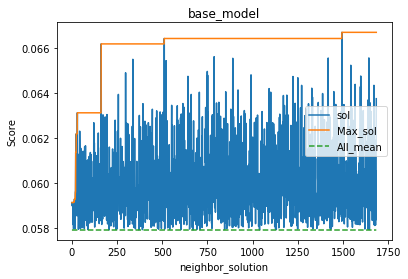

In [178]:
q_plot = []
x_plot = []
max_plt = []
mean_plt=[]
for i in range(len(graph_dot)):
    q_plot.append(graph_dot[i])
    x_plot.append(i)
    max_plt.append(max(q_plot))
    mean_plt.append(0.05793219386042783)
plt.figure()
plt.plot(x_plot, q_plot,label = 'sol')
plt.plot(x_plot, max_plt, label = 'Max_sol')
plt.plot(x_plot, mean_plt,label = 'All_mean',linestyle = '--')

plt.xlabel('neighbor_solution')
plt.ylabel('Score')
plt.title('base_model')
plt.legend()
plt.show()

In [179]:
glo_sol

[[[1, 26, 3], [0, 9, 8], [1, 11, 6], [0, 42, 10], [1, 26, 5]],
 [[1, 5, 2], [1, 49, 7], [1, 38, 7], [0, 5, 5], [0, 47, 8]],
 [[1, 32, 10], [0, 31, 3], [0, 46, 5], [1, 32, 10], [0, 29, 9]],
 [[1, 26, 8], [1, 46, 2], [0, 19, 9], [0, 1, 9], [0, 3, 7]],
 [[1, 37, 1], [1, 23, 7], [0, 9, 4], [1, 41, 2], [0, 25, 9]]]

In [180]:
glo_scr

[0.06482352706861176,
 0.06475046560621783,
 0.06469465865488302,
 0.066712219045875,
 0.06557552757267723]